# Predictive Modeling for Macroeconomic trends using Data Science
### By Victor Vassilev

## Introduction

**Domain of Interest: Macroeconomic Trends in Bulgaria**

Our project is dedicated to predicting and understanding macroeconomic trends in Bulgaria. Economists employ various tools and models to analyze economic indicators, labor market behavior, and the consequences of policy decisions in our country. In this endeavor, we delve into the intricate world of economic models, examining factors such as GDP growth, inflation, policy impacts, and more indicators which have profound implications for the future.

**Unveiling the Future: The Power of Predictive Modeling**

With the arsenal of Data Science techniques at our disposal, we seek to build predictive models that can shed light on the trajectory of macroeconomic trends. By leveraging historical and current data, we endeavor to unravel some of the complexities of economic systems and offer glimpses into potential scenarios that lie ahead.

**Project Roadmap**

Our journey through this project will encompass the following stages:

1. **Data Collection**: We will gather relevant macroeconomic datasets.

2. **Data Preprocessing**: We will clean and preprocess the data, ensuring its quality and suitability for analysis.

3. **Feature Engineering**: We will engineer informative features that capture the nuances of economic trends, potentially enhancing the predictive capabilities of our models.

4. **Exploratory Data Analysis (EDA)**: Through visualizations and statistical exploration, we will gain insights into the data, identify correlations, and set the stage for our modeling efforts.

5. **Model Selection**: We will choose appropriate regression and/or time series forecasting models to predict economic trends.

6. **Model Training and Validation**: We will train and validate our models using proper techniques, refining their performance and accuracy.

7. **Predictive Analysis and Visualization**: Applying our models to future scenarios, we will visualize predictions alongside historical data, providing a visual narrative of our findings.

8. **Interpretation and Insights**: Through thorough analysis, we will extract meaningful insights from our data, exploring the factors influencing economic trends.

9. **Conclusion and Future Directions**: Summarizing our project's contributions, we will suggest potential avenues for further research and refinement.

# Import Libraries

In [1]:
import pandas as pd
import conf_paths as paths
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Data Collection and Preprocessing: #

In this project, we will gather critical data on macroeconomic trends in Bulgaria. We aim to collect datasets related to GDP growth, inflation rates, and others. The following data sources will be utilized:

1. National Statistical Institute of Bulgaria (NSI): [https://www.nsi.bg/en](https://www.nsi.bg/en)
2. Macro Trends: [https://www.macrotrends.net/countries/BGR/bulgaria/net-migration](https://www.macrotrends.net/countries/BGR/bulgaria/net-migration)


We will retrieve and explore relevant datasets from these sources to build our predictive model and gain insights into the factors driving macroeconomic trends in Bulgaria.


## Macroeconomic Data ##

**Bulgaria GDP 1980-2023**

GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.

In [2]:
gdp_data = pd.read_csv(paths.gdp_path, sep=',', index_col='date', parse_dates=['date']).astype(float)
gdp_data.columns = ['gdp', 'gdp_per_capita_usd', 'annual_percent_change']
gdp_data.index = gdp_data.index.year
gdp_data.fillna(method='bfill', inplace=True)
gdp_data.head(100)

,gdp,gdp_per_capita_usd,annual_percent_change
date,,,
1980,19.839231,2238.8030,4.9002
1981,19.870000,2234.8148,4.9002
1982,19.342000,2169.0040,2.3346
1983,16.563667,1852.8134,3.4303
1984,17.594944,1963.5727,3.3964
1985,17.155421,1914.5506,2.6834
1986,20.249294,2260.4273,4.2076
1987,28.101000,3132.3014,6.0545
1988,22.555941,2511.3931,10.9447


**Bulgaria GDP Growth Rate 1981-2023**

Annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2010 U.S. dollars. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.

In [3]:
gdp_growth_data = pd.read_csv(paths.gdp_growth_path, sep=',', index_col='date', parse_dates=['date']).astype(float)
gdp_growth_data.columns = ['gdp_growth_pct', 'annual_change']
gdp_growth_data.index = gdp_growth_data.index.year
gdp_growth_data.fillna(method='bfill', inplace=True)
gdp_growth_data.head(100)

,gdp_growth_pct,annual_change
date,,
1981,4.9002,-2.57
1982,2.3346,-2.57
1983,3.4303,1.10
1984,3.3964,-0.03
1985,2.6834,-0.71
1986,4.2076,1.52
1987,6.0545,1.85
1988,10.9447,4.89
1989,-3.2899,-14.23


**Bulgaria GDP Per Capita 1980-2023**

GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

In [4]:
gdp_per_capita_data = pd.read_csv(paths.gdp_per_capita_path, sep=',', index_col='date', parse_dates=['date']).astype(
    float)
gdp_per_capita_data.columns = ['gdp_per_capita_usd', 'annual_growth_rate']
gdp_per_capita_data.index = gdp_per_capita_data.index.year
gdp_per_capita_data.fillna(method='bfill', inplace=True)
gdp_per_capita_data.head(100)

,gdp_per_capita_usd,annual_growth_rate
date,,
1980,2238.8030,-0.18
1981,2234.8148,-0.18
1982,2169.0040,-2.94
1983,1852.8134,-14.58
1984,1963.5727,5.98
1985,1914.5506,-2.50
1986,2260.4273,18.07
1987,3132.3014,38.57
1988,2511.3931,-19.82


**Bulgaria Debt to GDP Ratio 1998-2023**

Debt is the entire stock of direct government fixed-term contractual obligations to others outstanding on a particular date. It includes domestic and foreign liabilities such as currency and money deposits, securities other than shares, and loans. It is the gross amount of government liabilities reduced by the amount of equity and financial derivatives held by the government. Because debt is a stock rather than a flow, it is measured as of a given date, usually the last day of the fiscal year.

In [5]:
debt_to_gdp_data = pd.read_csv(paths.debt_to_gdp_path, sep=',', index_col='date', parse_dates=['date']).astype(float)
debt_to_gdp_data.columns = ['govt_debt_pct_gdp', 'annual_change']
debt_to_gdp_data.index = debt_to_gdp_data.index.year
debt_to_gdp_data.fillna(method='bfill', inplace=True)
debt_to_gdp_data.head(100)

,govt_debt_pct_gdp,annual_change
date,,
1998,56.7466,9.71
1999,66.4559,9.71
2000,61.5725,-4.88
2001,61.3340,-0.24
2002,52.8815,-8.45
2003,47.3999,-5.48
2004,40.1767,-7.22
2005,31.1379,-9.04
2006,27.7379,-3.40


**Bulgaria GNI 1982-2023**

GNI (formerly GNP) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current U.S. dollars. GNI, calculated in national currency, is usually converted to U.S. dollars at official exchange rates for comparisons across economies, although an alternative rate is used when the official exchange rate is judged to diverge by an exceptionally large margin from the rate actually applied in international transactions. To smooth fluctuations in prices and exchange rates, a special Atlas method of conversion is used by the World Bank. This applies a conversion factor that averages the exchange rate for a given year and the two preceding years, adjusted for differences in rates of inflation between the country, and through 2000, the G-5 countries (France, Germany, Japan, the United Kingdom, and the United States). From 2001, these countries include the Euro area, Japan, the United Kingdom, and the United States.

In [6]:
gni_data = pd.read_csv(paths.gni_path, sep=',', index_col='date', parse_dates=['date']).astype(float)
gni_data.columns = ['gni_billions_usd', 'per_capita_usd', 'annual_pct_growth']
gni_data.index = gni_data.index.year

gni_data.head(100)

,gni_billions_usd,per_capita_usd,annual_pct_growth
date,,,
1982,21.029651,2360.0,NaN
1983,18.679756,2090.0,NaN
1984,18.027947,2010.0,NaN
1985,17.466579,1950.0,NaN
1986,19.588769,2190.0,NaN
1987,24.404178,2720.0,NaN
1988,27.889860,3110.0,NaN
1989,25.143314,2830.0,NaN
1990,19.583467,2250.0,NaN


**Bulgaria GNI Per Capita 1982-2023**

GNI per capita (formerly GNP per capita) is the gross national income, converted to U.S. dollars using the World Bank Atlas method, divided by the midyear population. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. GNI, calculated in national currency, is usually converted to U.S. dollars at official exchange rates for comparisons across economies, although an alternative rate is used when the official exchange rate is judged to diverge by an exceptionally large margin from the rate actually applied in international transactions. To smooth fluctuations in prices and exchange rates, a special Atlas method of conversion is used by the World Bank. This applies a conversion factor that averages the exchange rate for a given year and the two preceding years, adjusted for differences in rates of inflation between the country, and through 2000, the G-5 countries (France, Germany, Japan, the United Kingdom, and the United States). From 2001, these countries include the Euro area, Japan, the United Kingdom, and the United States.

In [7]:
gni_per_capita_data = pd.read_csv(paths.gni_per_capita_path, sep=',', index_col='date', parse_dates=['date']).astype(
    float)
gni_per_capita_data.columns = ['gni_per_capita_usd', 'annual_pct_growth']
gni_per_capita_data.index = gni_per_capita_data.index.year
gni_per_capita_data.fillna(method='bfill', inplace=True)
gni_per_capita_data.head(100)

,gni_per_capita_usd,annual_pct_growth
date,,
1982,2360.0,-11.44
1983,2090.0,-11.44
1984,2010.0,-3.83
1985,1950.0,-2.99
1986,2190.0,12.31
1987,2720.0,24.20
1988,3110.0,14.34
1989,2830.0,-9.00
1990,2250.0,-20.49


**Bulgaria Inflation Rate 1986-2023**

Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.

In [8]:
inflation_rate_data = pd.read_csv(paths.inflation_rate_path, sep=',', index_col='date', parse_dates=['date']).astype(
    float)
inflation_rate_data.columns = ['inflation_rate', 'annual_change']
inflation_rate_data.index = inflation_rate_data.index.year
inflation_rate_data.fillna(method='bfill', inplace=True)
inflation_rate_data.head(100)

,inflation_rate,annual_change
date,,
1986,2.7000,0.03
1987,2.7264,0.03
1988,2.3697,-0.36
1989,6.3889,4.02
1990,23.8000,17.41
1991,338.4491,314.65
1992,91.2979,-247.15
1993,72.8788,-18.42
1994,96.0573,23.18


**Bulgaria Economic Growth 1980-2023**

GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.

In [9]:
economic_growth_data = pd.read_csv(paths.economic_growth_path, sep=',', index_col='date', parse_dates=['date']).astype(
    float)
economic_growth_data.columns = ['gdp_billions_usd', 'per_capita_usd', 'growth_rate_annual_pct_change']
economic_growth_data.index = economic_growth_data.index.year
economic_growth_data.fillna(method='bfill', inplace=True)
economic_growth_data.head(100)

,gdp_billions_usd,per_capita_usd,growth_rate_annual_pct_change
date,,,
1980,19.839231,2238.8030,4.9002
1981,19.870000,2234.8148,4.9002
1982,19.342000,2169.0040,2.3346
1983,16.563667,1852.8134,3.4303
1984,17.594944,1963.5727,3.3964
1985,17.155421,1914.5506,2.6834
1986,20.249294,2260.4273,4.2076
1987,28.101000,3132.3014,6.0545
1988,22.555941,2511.3931,10.9447


# Macroeconomics #


## 2. Exploratory Data Analysis (EDA) ##

Let's start exploring the macroeconomic datasets. Visualize the trends over time to identify patterns and trends.

In [10]:
gdp_data.head(gdp_data.size)

,gdp,gdp_per_capita_usd,annual_percent_change
date,,,
1980,19.839231,2238.8030,4.9002
1981,19.870000,2234.8148,4.9002
1982,19.342000,2169.0040,2.3346
1983,16.563667,1852.8134,3.4303
1984,17.594944,1963.5727,3.3964
1985,17.155421,1914.5506,2.6834
1986,20.249294,2260.4273,4.2076
1987,28.101000,3132.3014,6.0545
1988,22.555941,2511.3931,10.9447


In [11]:
gdp_data['annual_percent_change'] = gdp_data['gdp'].pct_change() * 100
gdp_data

,gdp,gdp_per_capita_usd,annual_percent_change
date,,,
1980,19.839231,2238.8030,NaN
1981,19.870000,2234.8148,0.155093
1982,19.342000,2169.0040,-2.657272
1983,16.563667,1852.8134,-14.364251
1984,17.594944,1963.5727,6.226144
1985,17.155421,1914.5506,-2.498010
1986,20.249294,2260.4273,18.034376
1987,28.101000,3132.3014,38.775208
1988,22.555941,2511.3931,-19.732603


In [12]:
gdp_per_capita_data.head(gdp_per_capita_data.size)

,gdp_per_capita_usd,annual_growth_rate
date,,
1980,2238.8030,-0.18
1981,2234.8148,-0.18
1982,2169.0040,-2.94
1983,1852.8134,-14.58
1984,1963.5727,5.98
1985,1914.5506,-2.50
1986,2260.4273,18.07
1987,3132.3014,38.57
1988,2511.3931,-19.82


In [13]:
gdp_per_capita_data['annual_growth_rate'] = gdp_per_capita_data['gdp_per_capita_usd'].pct_change() * 100
gdp_per_capita_data

,gdp_per_capita_usd,annual_growth_rate
date,,
1980,2238.8030,NaN
1981,2234.8148,-0.178140
1982,2169.0040,-2.944799
1983,1852.8134,-14.577686
1984,1963.5727,5.977898
1985,1914.5506,-2.496577
1986,2260.4273,18.065686
1987,3132.3014,38.571207
1988,2511.3931,-19.822751


In [14]:
def plot_line(figsize, data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=figsize)
    sns.lineplot(data=data, x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(data.index.values.min(), data.index.values.max(), step=2), rotation=45)
    plt.show()


def plot_changes(data, x, y, title, xlabel, ylabel):
    # Calculate summary statistics
    mean = data[y].mean()
    std = data[y].std()

    # Visualize GDP growth rate trends
    plt.figure(figsize=(25, 10))

    plt.subplot(1, 2, 1)  # Create a subplot for the bar plot
    sns.lineplot(data=data, x=x, y=y)
    plt.title(title + ' vs Mean')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(data.index.values.min(), data.index.values.max(), step=2), rotation=45)
    plt.axhline(y=mean, color='r', linestyle='--', label='Mean')
    plt.legend()

    # Create a new column for color based on sign of growth
    data['color'] = ['green' if x >= 0 else 'red' for x in data[y]]

    # Create the bar plot
    plt.subplot(1, 2, 2)  # Create a subplot for the bar plot
    bars = plt.bar(data.index, data[y], color=data['color'])

    # Add labels and title
    plt.title(title + ' Bar Plot')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Add color legend
    red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10,
                           label='Negative Growth')
    green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10,
                             label='Positive Growth')
    plt.legend(handles=[red_patch, green_patch], loc='upper left')

    # Rotate x-axis labels for better readability
    plt.xticks(np.arange(data.index.values.min(), data.index.values.max(), step=2), rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return mean, std


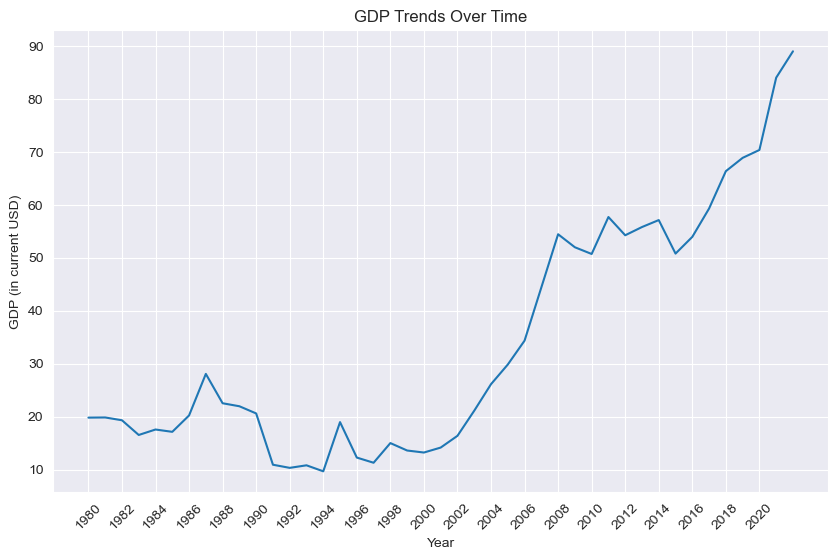

In [15]:
# Visualize GDP trends
plot_line(figsize=(10, 6), data=gdp_data, x='date', y='gdp', title='GDP Trends Over Time', xlabel='Year',
          ylabel='GDP (in current USD)')

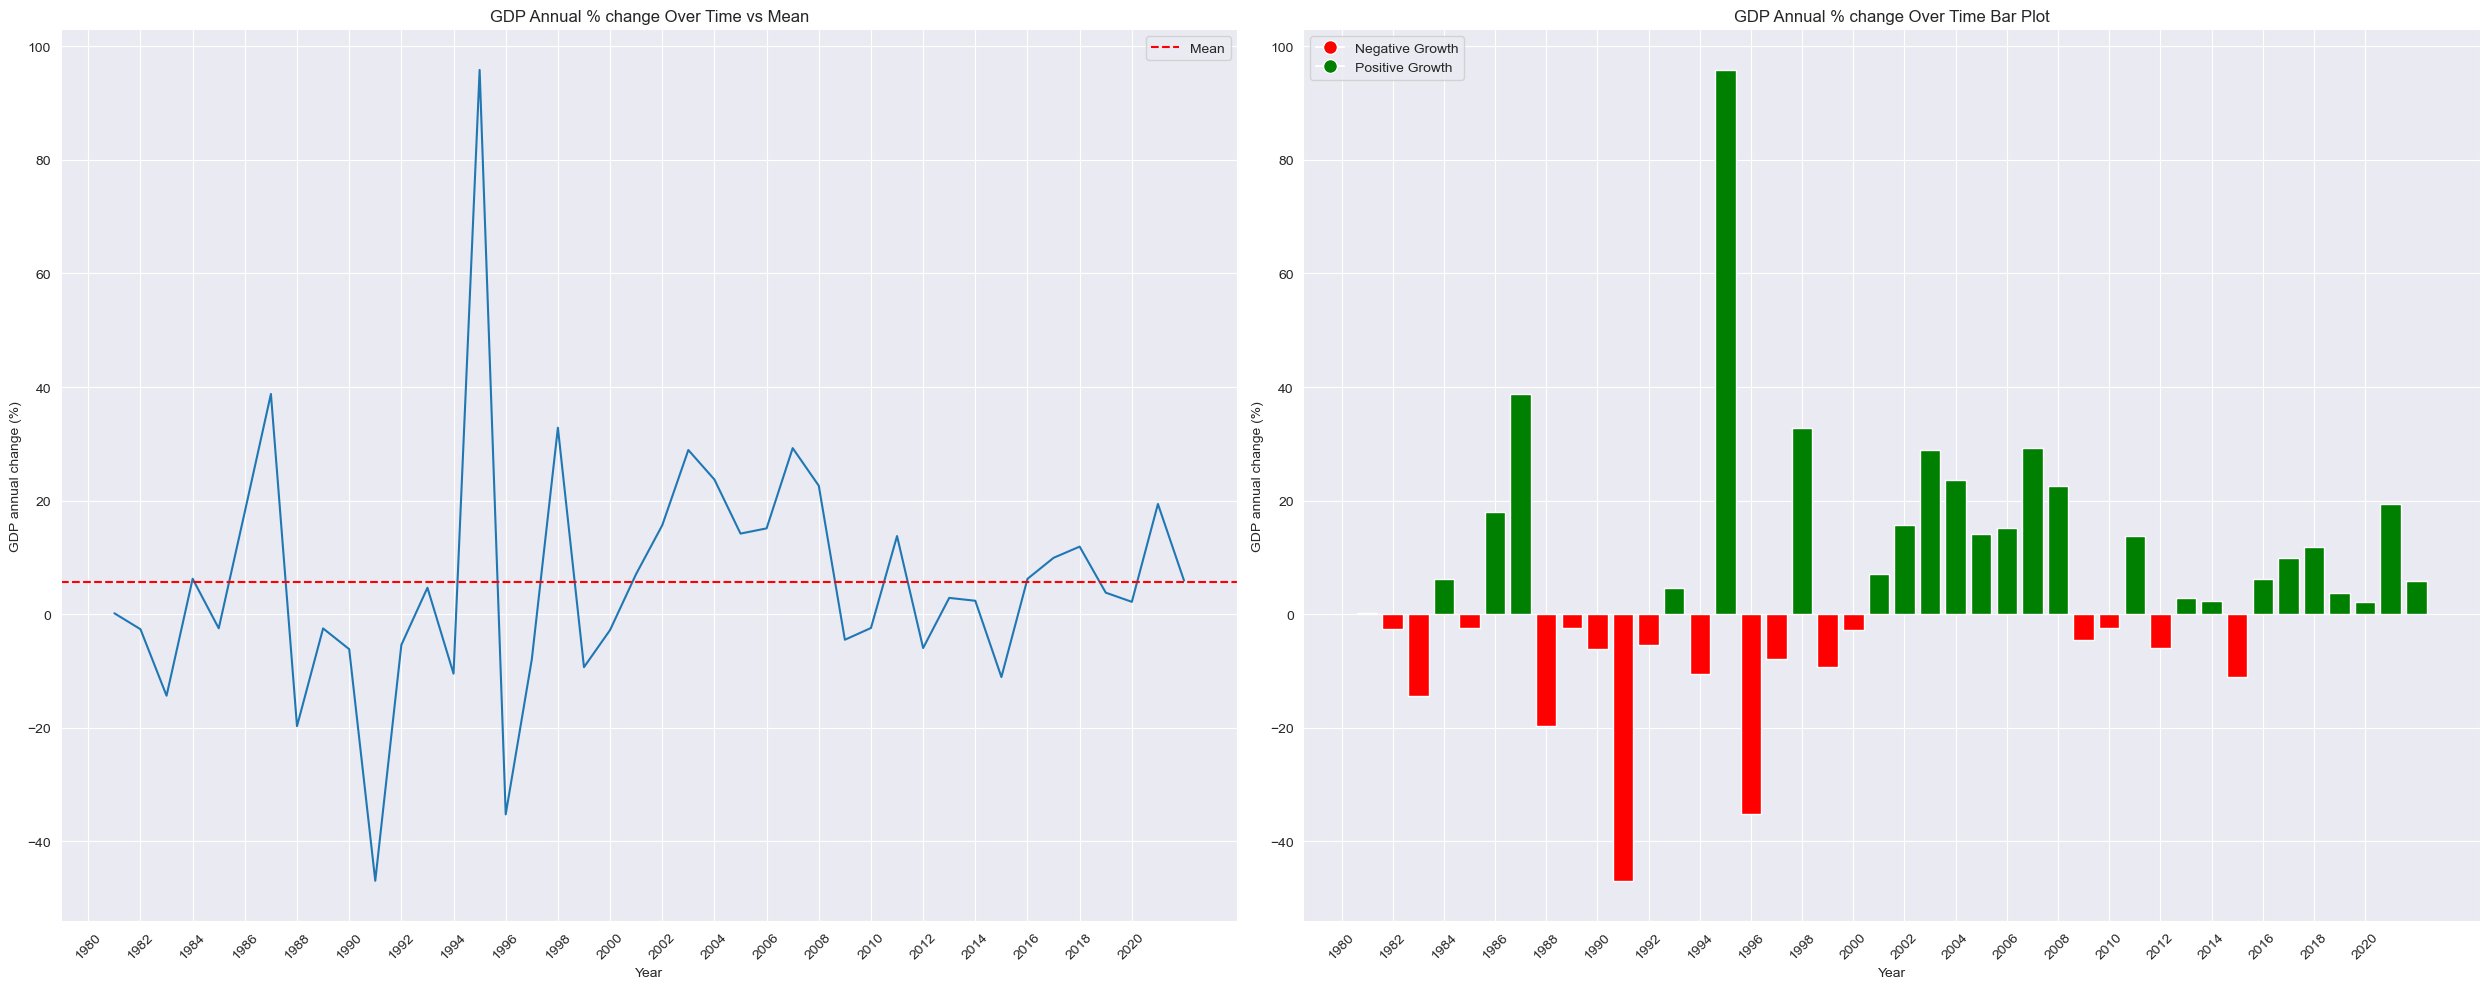

In [16]:
gdp_growth_mean, gdp_growth_std = plot_changes(gdp_data, 'date', 'annual_percent_change',
                                               'GDP Annual % change Over Time', 'Year', 'GDP annual change (%)')

In the context of economic analysis, understanding the standard deviation of GDP growth rates is important for assessing the volatility and stability of an economy. A higher standard deviation may indicate economic instability or uncertainty, while a lower standard deviation may suggest a more consistent and predictable economic performance.

In [17]:
print(f'Standard deviation of the GDP growth rate: {gdp_growth_std}')

Standard deviation of the GDP growth rate: 21.949081646258673


**GDP per capita trends**

In [18]:
gdp_per_capita_data.head(gdp_per_capita_data.size)

,gdp_per_capita_usd,annual_growth_rate
date,,
1980,2238.8030,NaN
1981,2234.8148,-0.178140
1982,2169.0040,-2.944799
1983,1852.8134,-14.577686
1984,1963.5727,5.977898
1985,1914.5506,-2.496577
1986,2260.4273,18.065686
1987,3132.3014,38.571207
1988,2511.3931,-19.822751


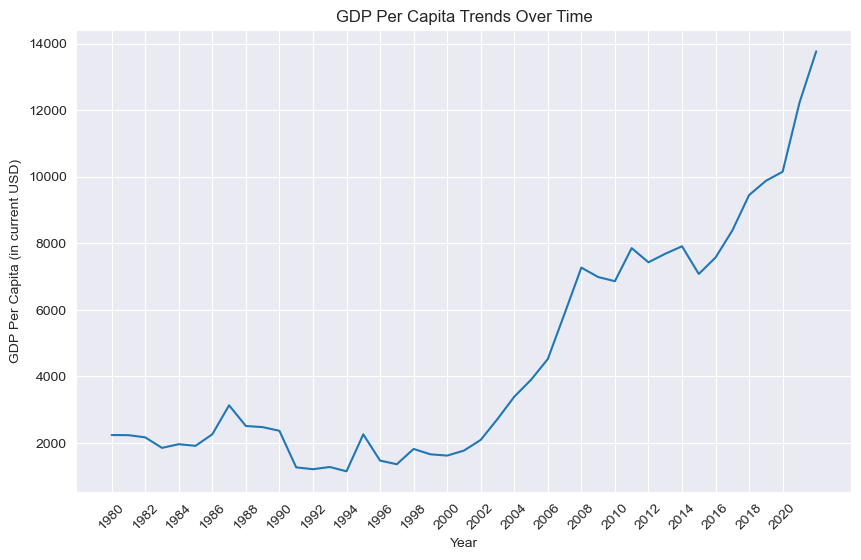

In [19]:
# Calculate statistics for gdp per capita
plot_line((10, 6), gdp_per_capita_data, 'date', 'gdp_per_capita_usd', 'GDP Per Capita Trends Over Time', 'Year',
          'GDP Per Capita (in current USD)')

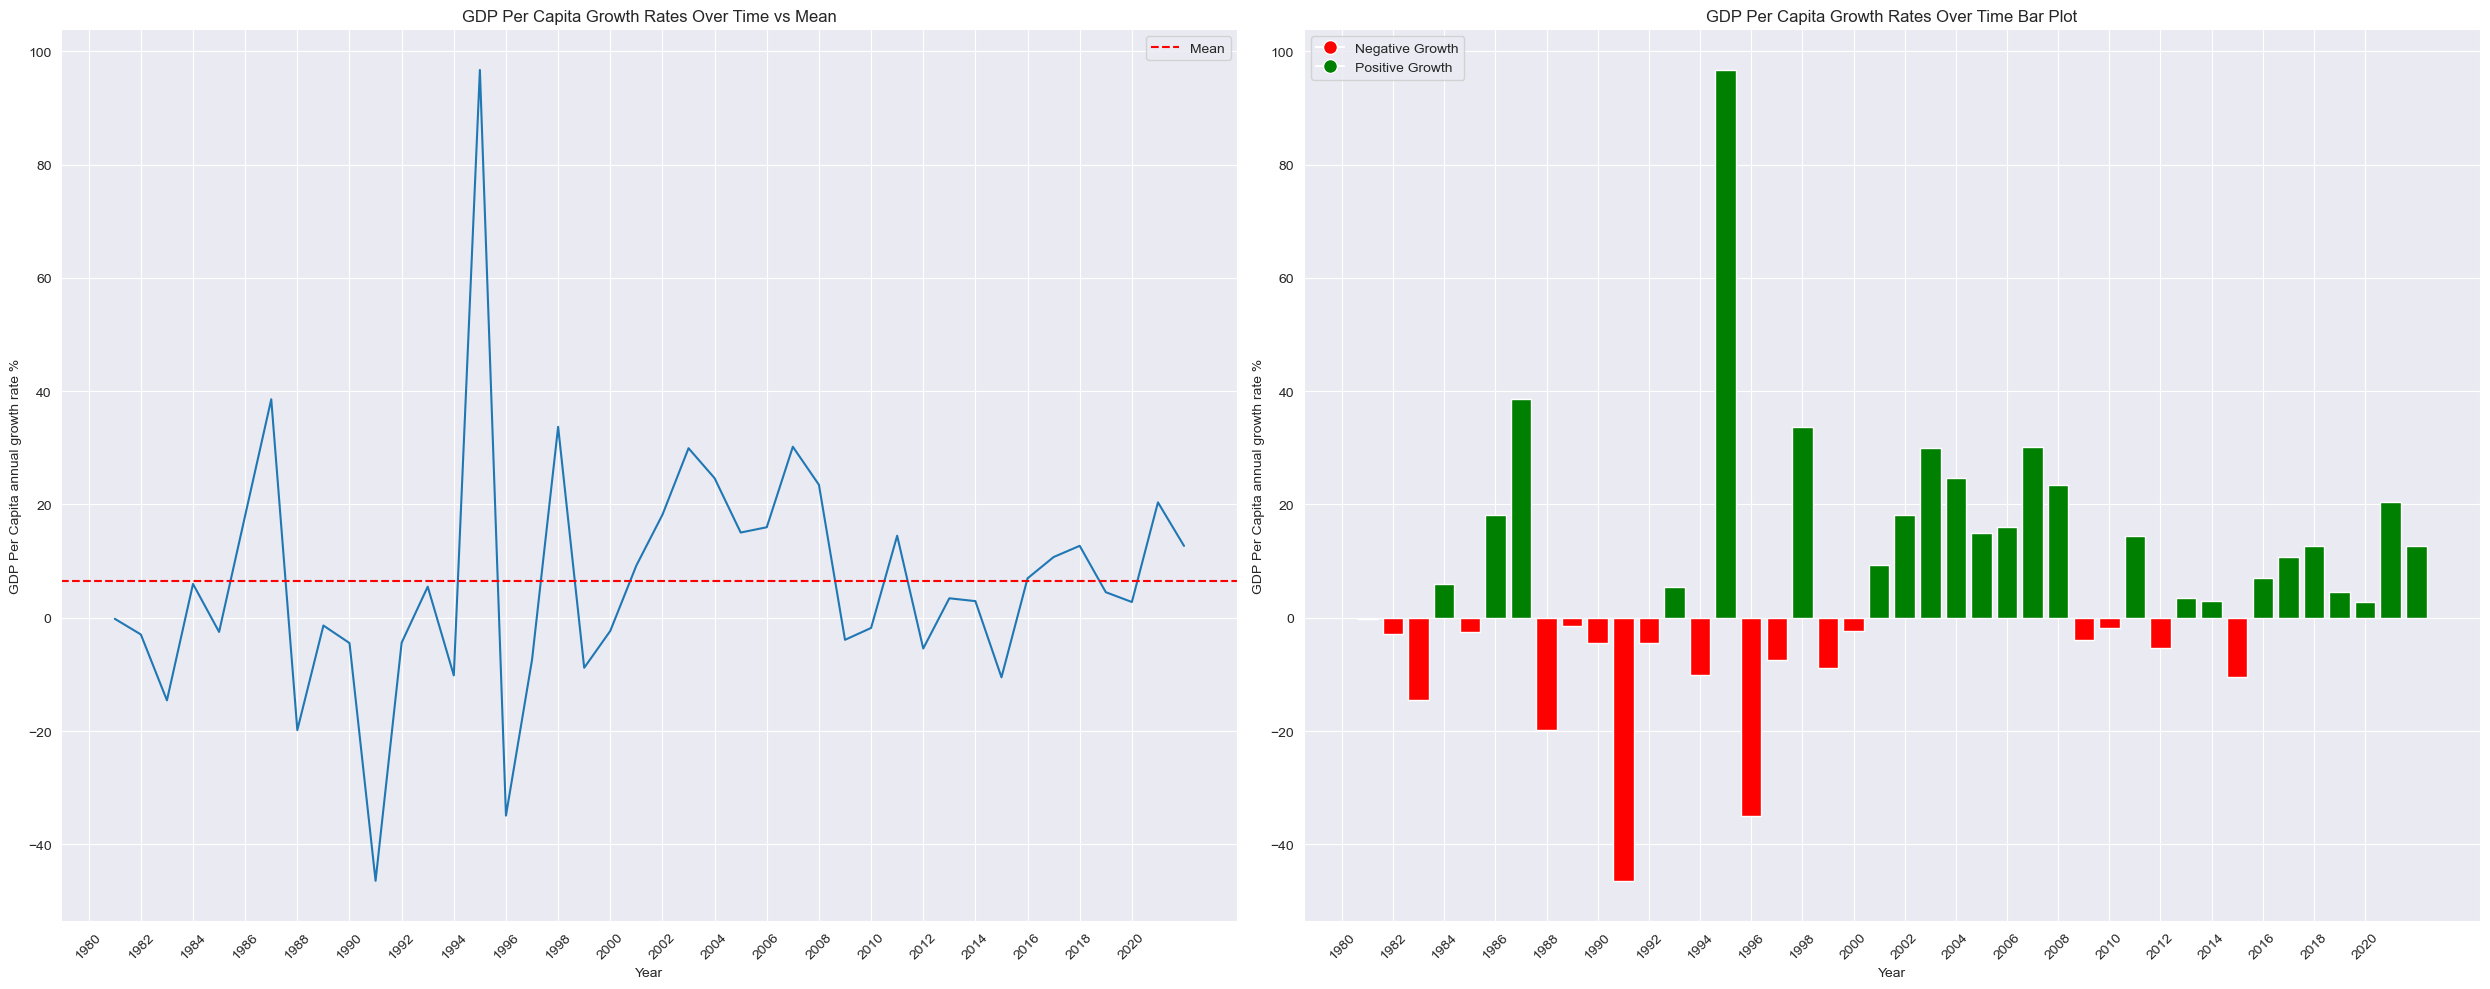

In [20]:
gdp_per_capita_annual_growth_mean, gdp_per_capita_annual_growth_std = plot_changes(gdp_per_capita_data, 'date',
                                                                                   'annual_growth_rate',
                                                                                   'GDP Per Capita Growth Rates Over Time',
                                                                                   'Year',
                                                                                   'GDP Per Capita annual growth rate %')

The standard deviation pf GDP per capita growth rates is relatively high!
A high standard deviation suggests that GDP per capita growth rates have experienced significant fluctuations, both positive and negative, over the specified period.
This level of variability might be indicative of an economy that is more susceptible to economic shocks, policy uncertainties, or structural challenges.
It could also reflect a diverse economic landscape with sectors or regions experiencing varying growth trajectories.

In [21]:
print(f'Standard deviation of the GDP per capita growth rates: {gdp_per_capita_annual_growth_std}')

Standard deviation of the GDP per capita growth rates: 22.10373019710417


**Debt-to-GDP Ratio trends**

A high Debt-to-GDP ratio indicates that a country might have difficulty repaying its debt, whereas a low ratio suggests a more stable economy, less burdened by public debt.
Rising Debt-to-GDP ratio over an extended period can signal unsustainability in a country's fiscal policies, potentially leading to adverse consequences such as higher borrowing costs or financial crises.

In [22]:
debt_to_gdp_data.head(debt_to_gdp_data.size)

,govt_debt_pct_gdp,annual_change
date,,
1998,56.7466,9.71
1999,66.4559,9.71
2000,61.5725,-4.88
2001,61.3340,-0.24
2002,52.8815,-8.45
2003,47.3999,-5.48
2004,40.1767,-7.22
2005,31.1379,-9.04
2006,27.7379,-3.40


In [23]:
debt_to_gdp_data['annual_change'] = debt_to_gdp_data['govt_debt_pct_gdp'].diff()
debt_to_gdp_data

,govt_debt_pct_gdp,annual_change
date,,
1998,56.7466,NaN
1999,66.4559,9.7093
2000,61.5725,-4.8834
2001,61.3340,-0.2385
2002,52.8815,-8.4525
2003,47.3999,-5.4816
2004,40.1767,-7.2232
2005,31.1379,-9.0388
2006,27.7379,-3.4000


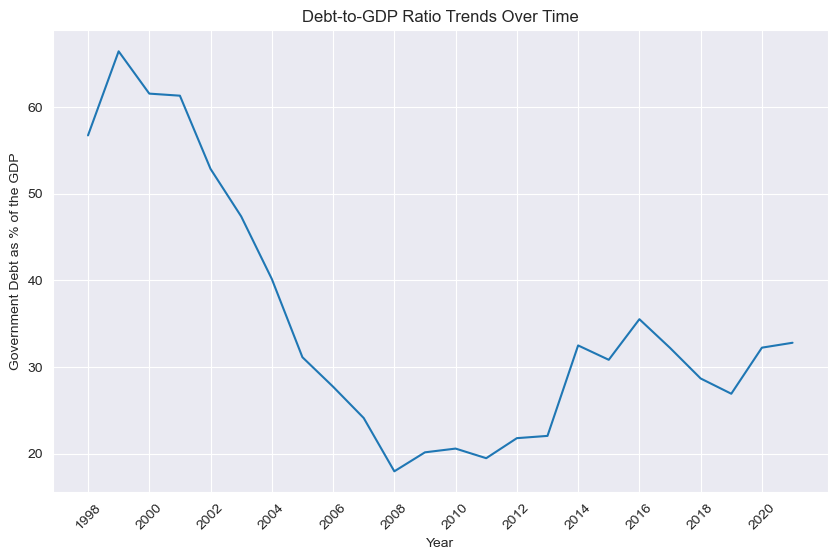

In [24]:
plot_line((10, 6), debt_to_gdp_data, 'date', 'govt_debt_pct_gdp', "Debt-to-GDP Ratio Trends Over Time", 'Year',
          'Government Debt as % of the GDP')

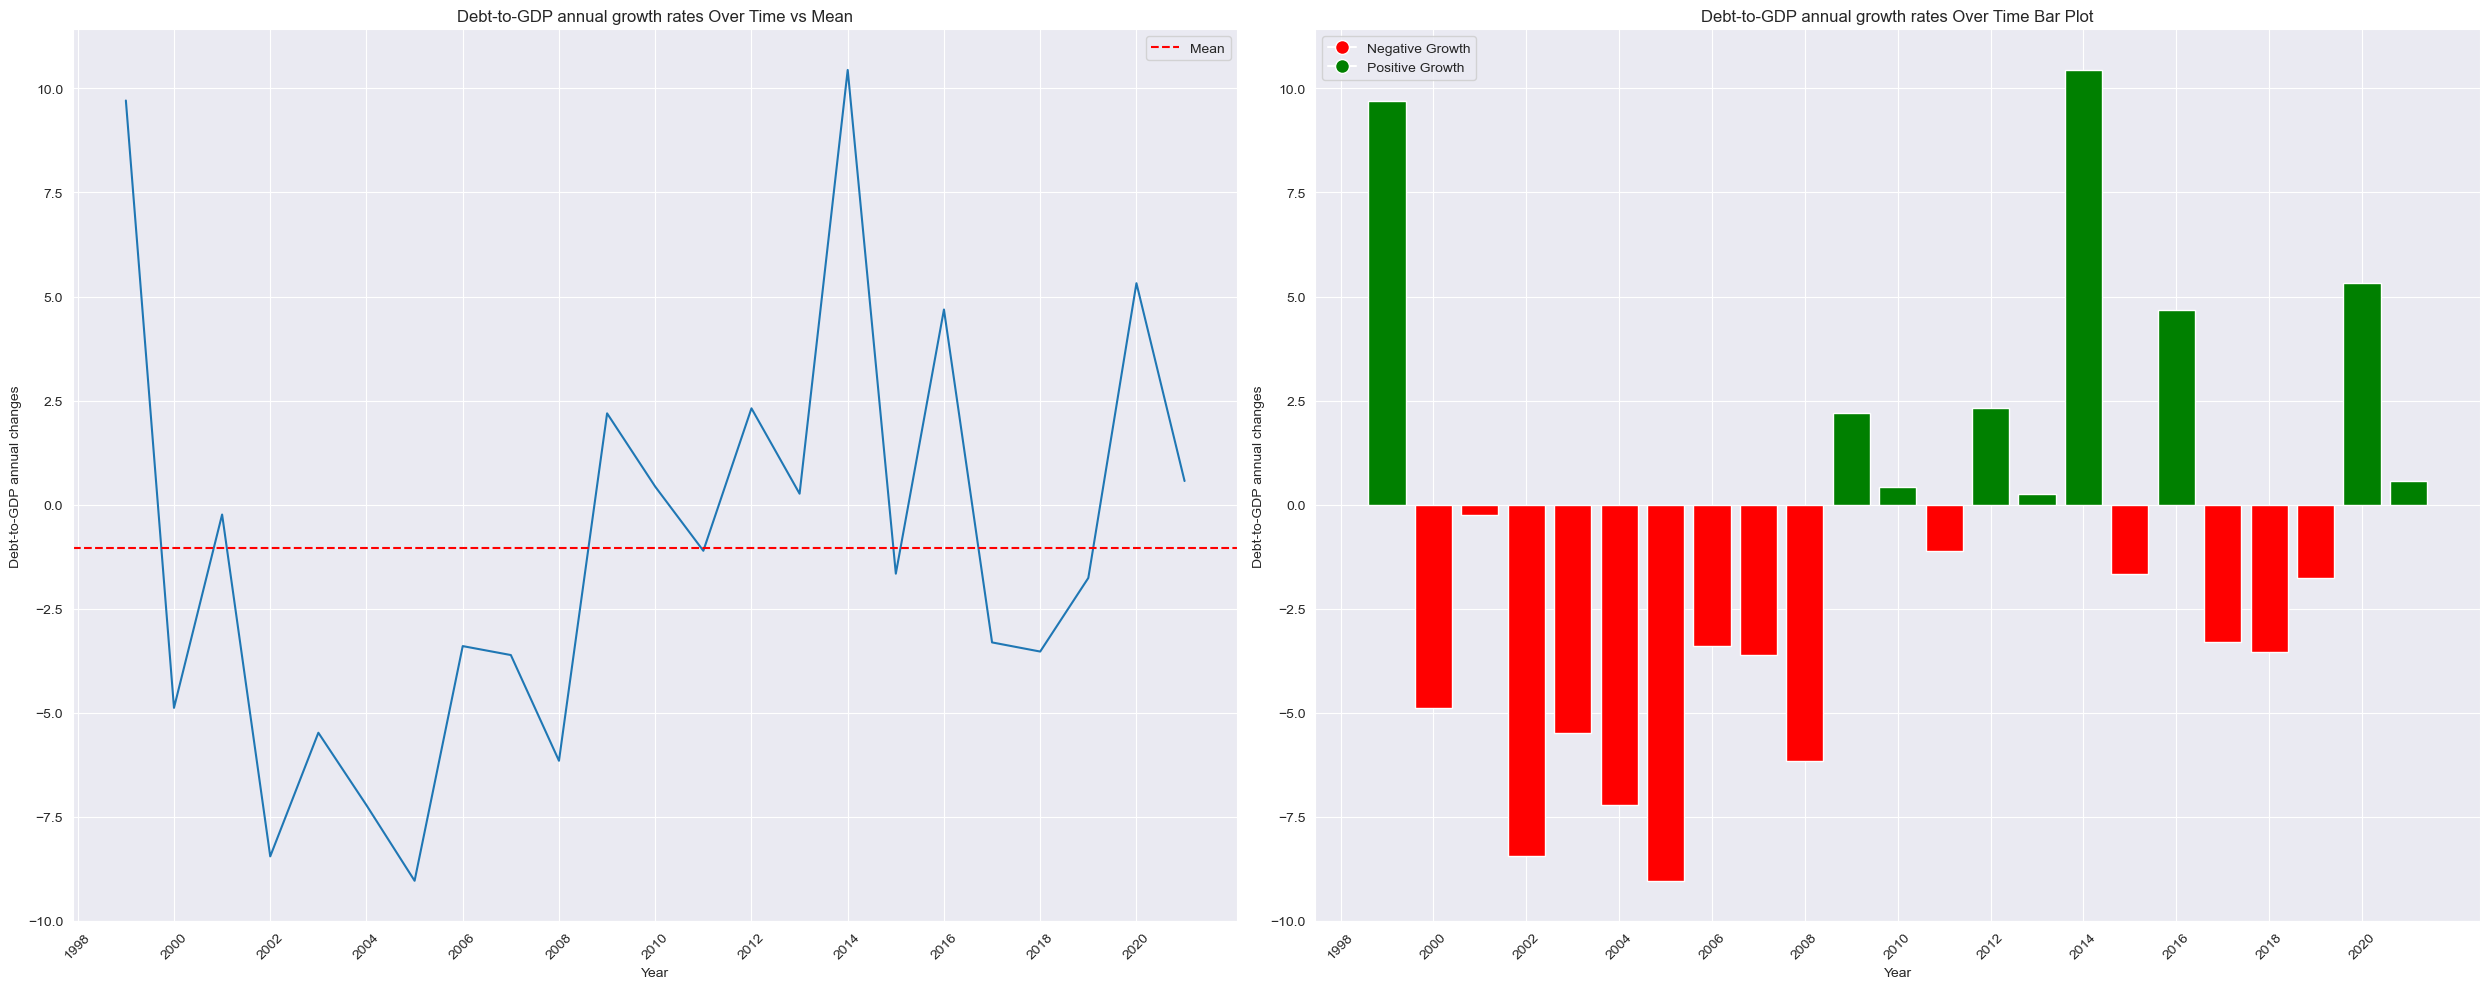

In [25]:
# Visualizng Debt-to-GDP annual percent changes
debt_to_gdp_annual_change_mean, debt_to_gdp_annual_change_std = plot_changes(debt_to_gdp_data, 'date', 'annual_change',
                                                                             'Debt-to-GDP annual growth rates Over Time',
                                                                             'Year', 'Debt-to-GDP annual changes')

 A standard deviation of 5.526 suggests that the annual growth rates of Debt-to-GDP have exhibited a moderate amount of fluctuation from year to year. While the variability is not extremely high, it still signifies that there have been notable changes in the debt-to-GDP ratio over time. Overall, a moderate standard deviation of Debt-to-GDP annual growth rates suggests that while there is some variability, the country's debt dynamics have been relatively controlled over the analyzed period

In [26]:
print(f'Standard deviation of the Debt-to-GDP annual growth rates: {debt_to_gdp_annual_change_std}')

Standard deviation of the Debt-to-GDP annual growth rates: 5.186266156373301


C:\Users\user\AppData\Local\Temp\ipykernel_1676\616967471.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = ['green' if x >= 0 else 'red' for x in data[y]]


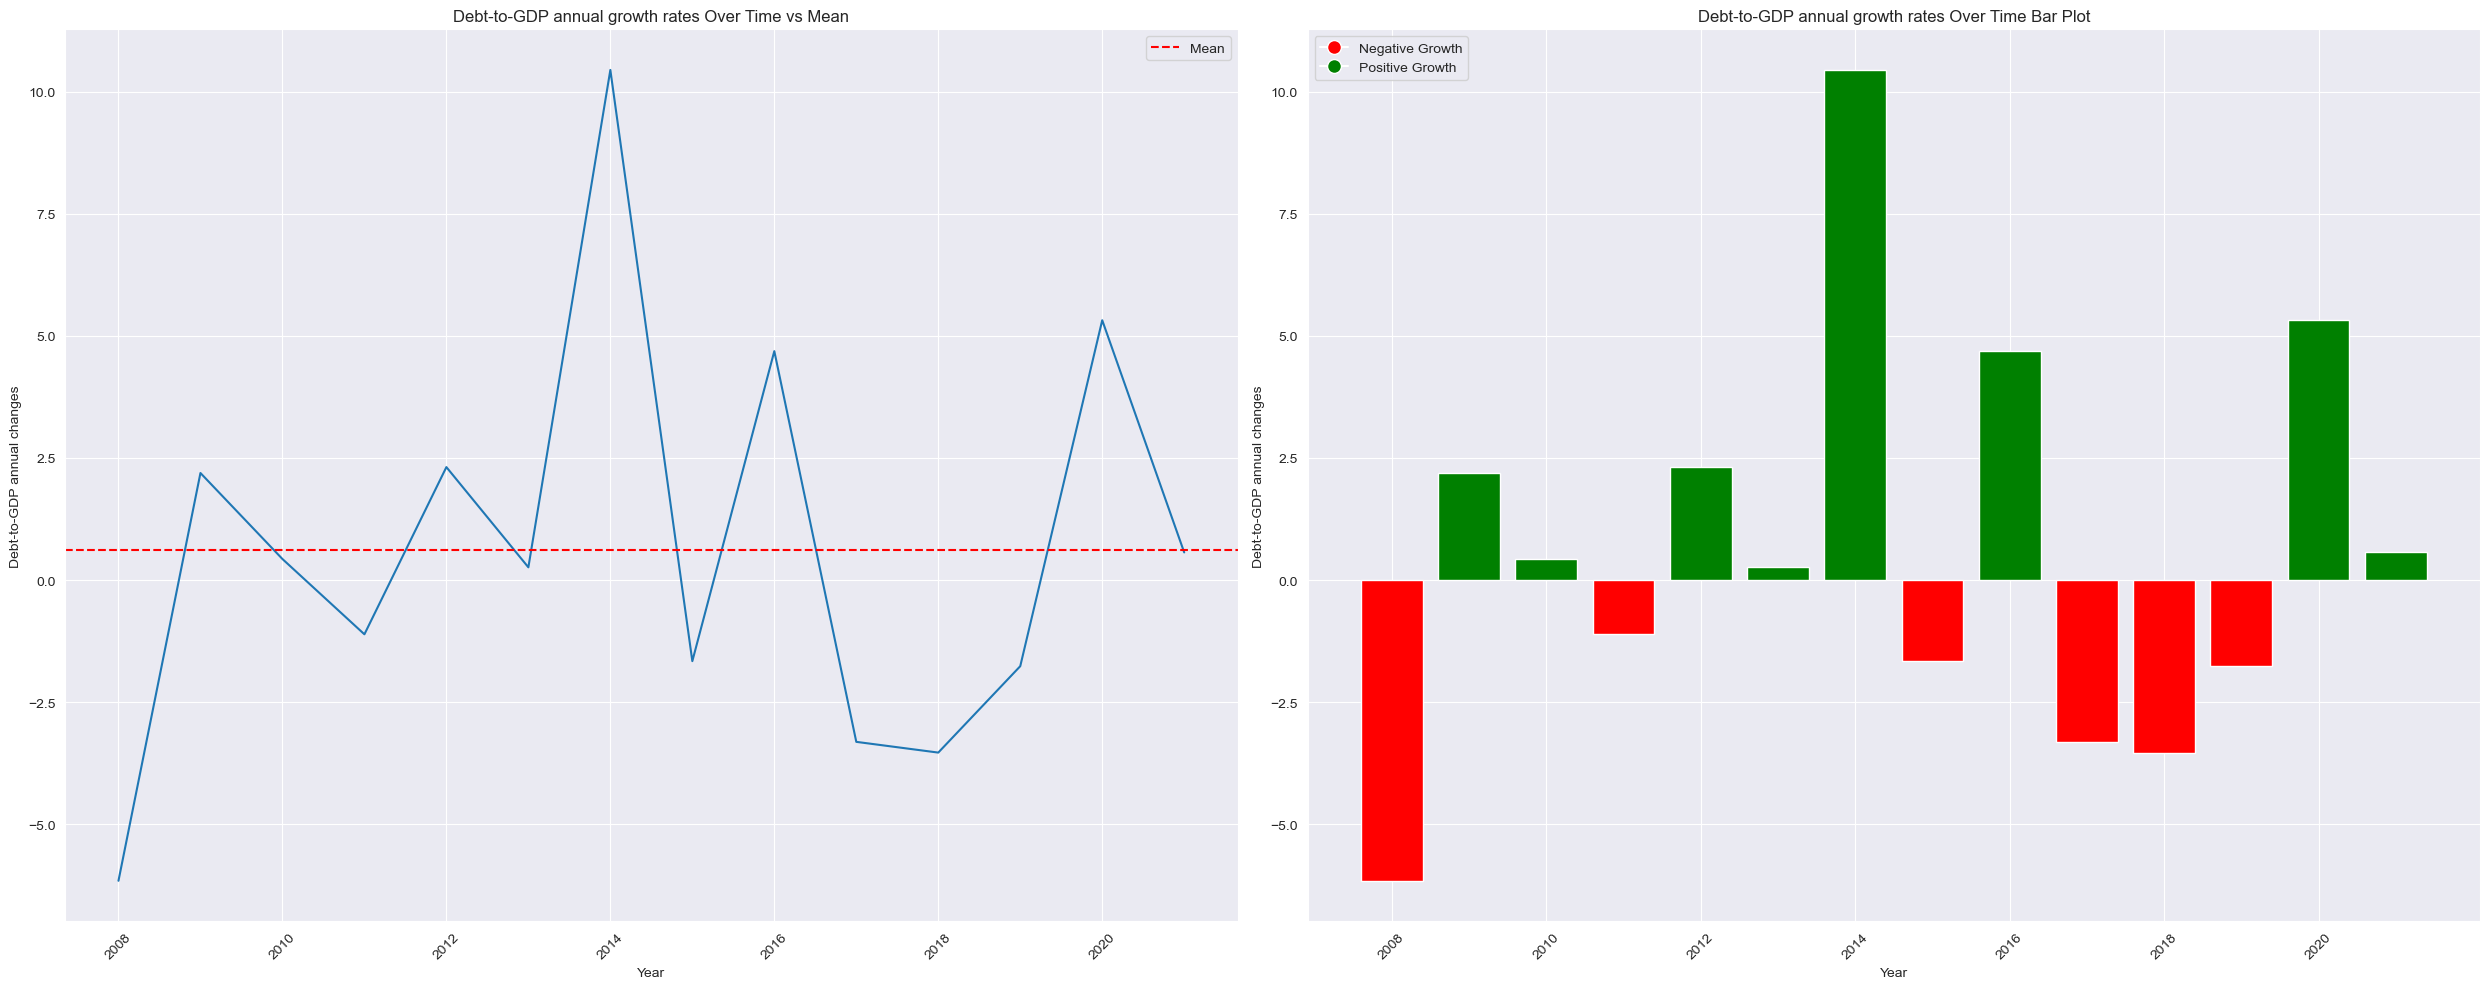

In [27]:
# Visualizng Debt-to-GDP annual percent changes
debt_to_gdp_annual_change_mean_new, debt_to_gdp_annual_change_std_new = plot_changes(
    debt_to_gdp_data[debt_to_gdp_data.index >= 2008], 'date', 'annual_change',
    'Debt-to-GDP annual growth rates Over Time', 'Year', 'Debt-to-GDP annual changes')

In [28]:
print(f'Mean value of the Debt-to-GDP annual growth rates after 2008: {debt_to_gdp_annual_change_mean_new}')

Mean value of the Debt-to-GDP annual growth rates after 2008: 0.6204999999999998


The average annual increase of 0.62 percentage points in the period after 2008 indicates a relatively gradual accumulation of debt compared to GDP. While this is a moderate rate of growth, it still adds up over time and can impact the overall fiscal health of the country

### GNI - Gross national income ###

In [29]:
gni_data

,gni_billions_usd,per_capita_usd,annual_pct_growth
date,,,
1982,21.029651,2360.0,NaN
1983,18.679756,2090.0,NaN
1984,18.027947,2010.0,NaN
1985,17.466579,1950.0,NaN
1986,19.588769,2190.0,NaN
1987,24.404178,2720.0,NaN
1988,27.889860,3110.0,NaN
1989,25.143314,2830.0,NaN
1990,19.583467,2250.0,NaN


In [30]:
gni_data['annual_pct_growth'] = gni_data['gni_billions_usd'].pct_change() * 100

In [31]:
gni_data

,gni_billions_usd,per_capita_usd,annual_pct_growth
date,,,
1982,21.029651,2360.0,NaN
1983,18.679756,2090.0,-11.174197
1984,18.027947,2010.0,-3.489387
1985,17.466579,1950.0,-3.113879
1986,19.588769,2190.0,12.150007
1987,24.404178,2720.0,24.582500
1988,27.889860,3110.0,14.283135
1989,25.143314,2830.0,-9.847832
1990,19.583467,2250.0,-22.112624


In [32]:
gni_per_capita_data

,gni_per_capita_usd,annual_pct_growth
date,,
1982,2360.0,-11.44
1983,2090.0,-11.44
1984,2010.0,-3.83
1985,1950.0,-2.99
1986,2190.0,12.31
1987,2720.0,24.20
1988,3110.0,14.34
1989,2830.0,-9.00
1990,2250.0,-20.49


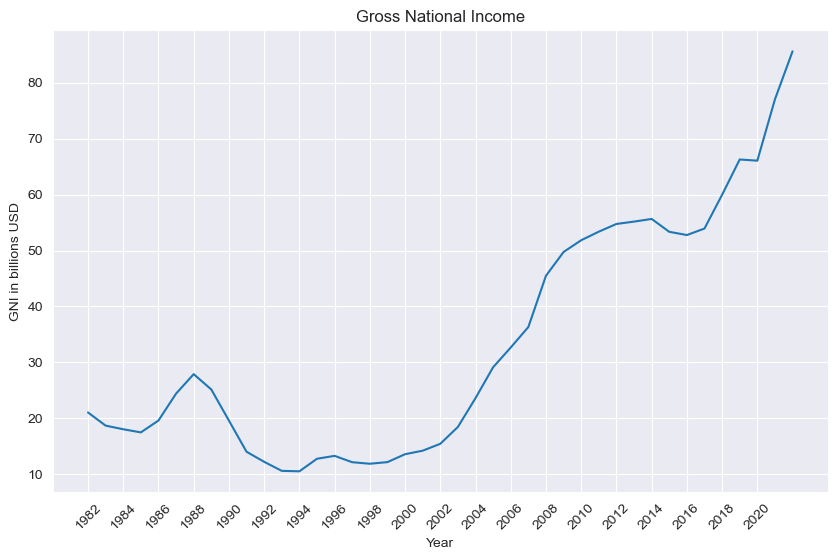

In [33]:
plot_line((10, 6), gni_data, 'date', 'gni_billions_usd', 'Gross National Income', 'Year', 'GNI in billions USD')


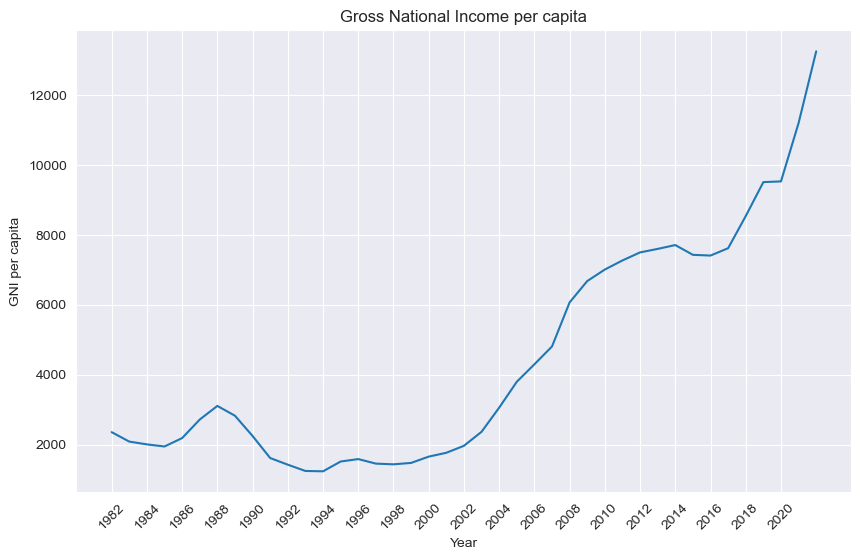

In [34]:
plot_line((10, 6), gni_data, 'date', 'per_capita_usd', 'Gross National Income per capita', 'Year', 'GNI per capita')

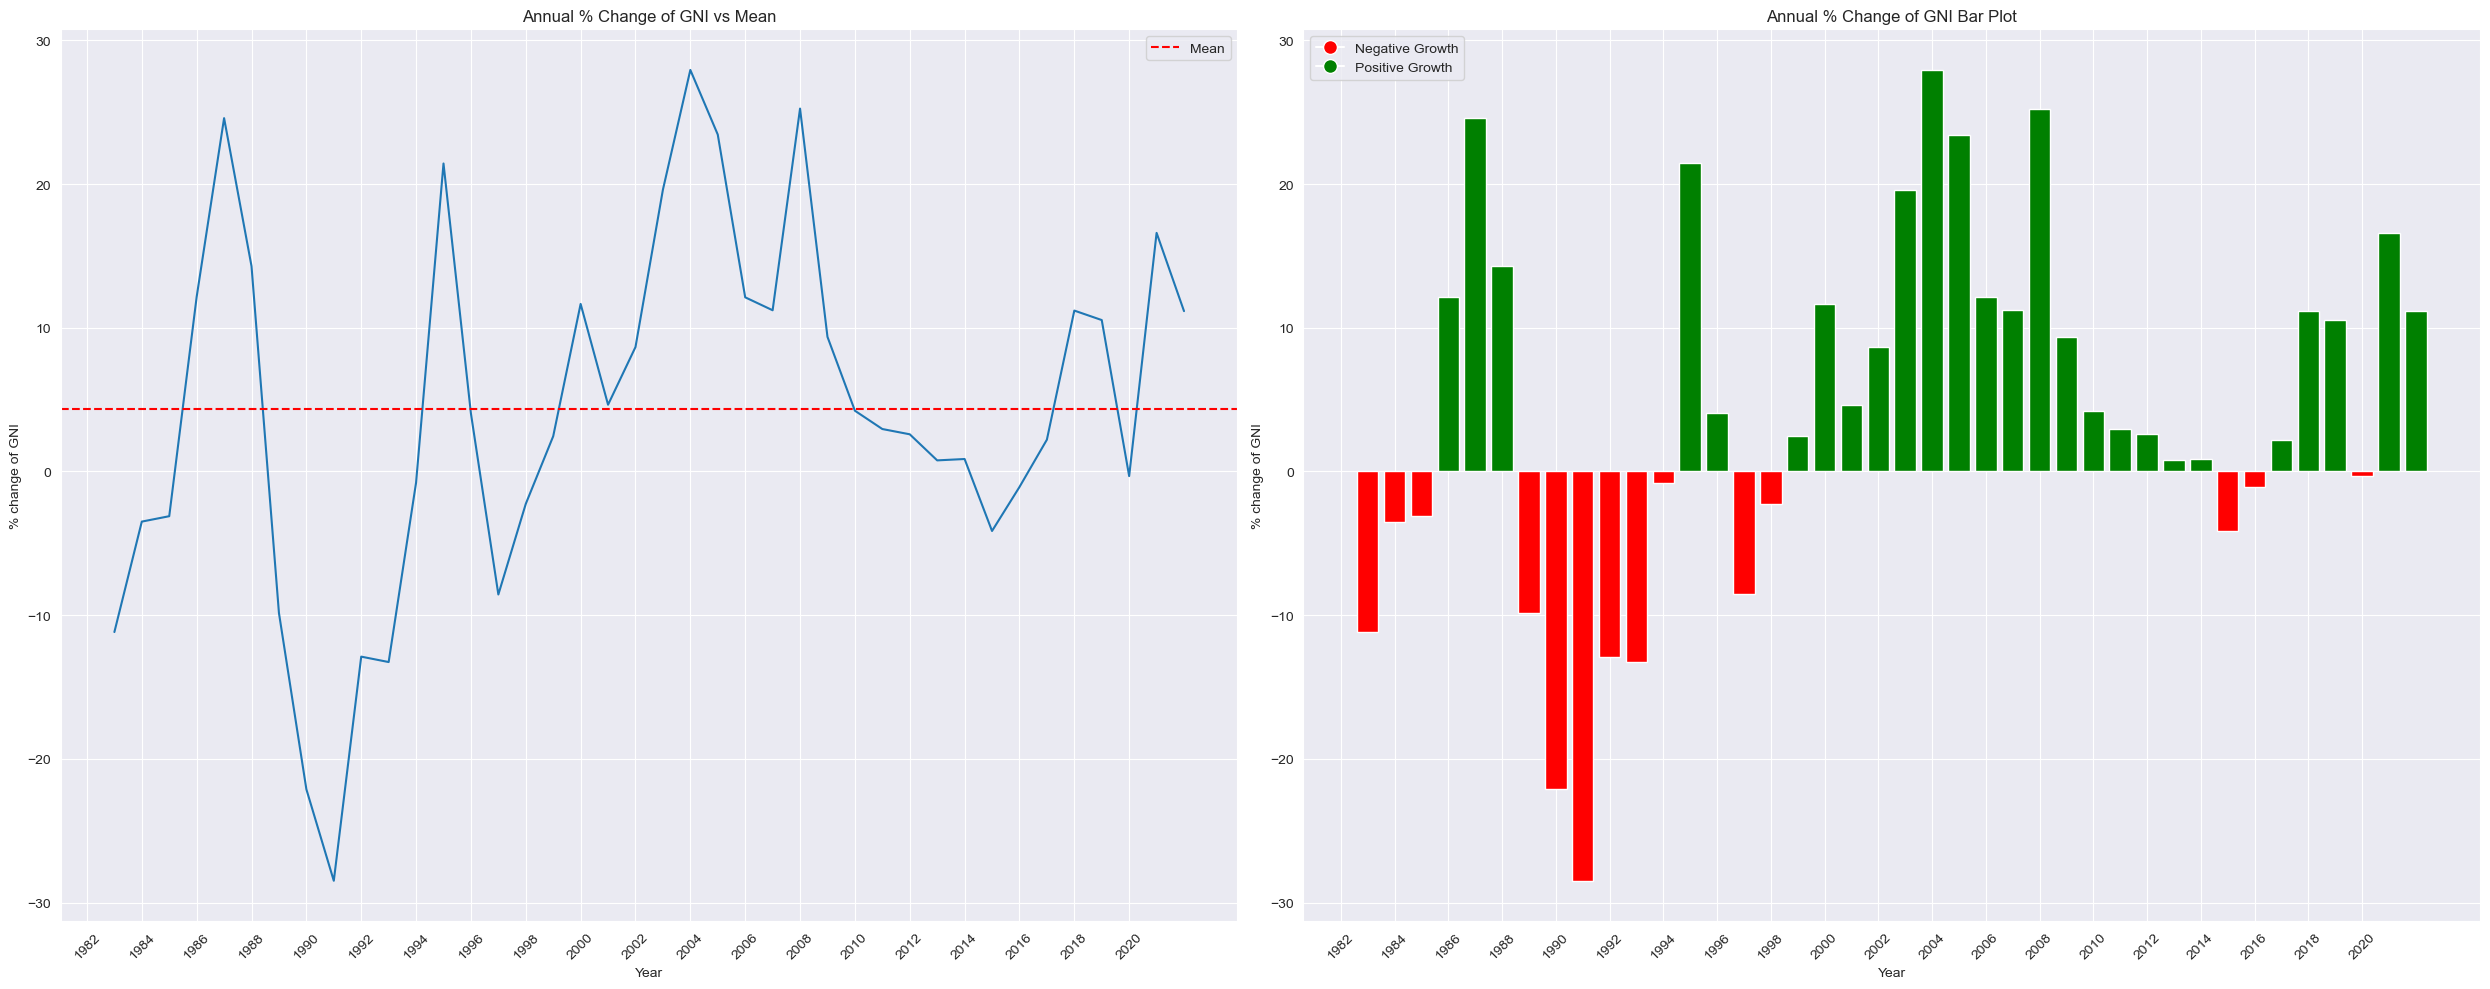

In [35]:
gni_pct_change_mean, gni_pct_change_std = plot_changes(gni_data, 'date', 'annual_pct_growth', 'Annual % Change of GNI',
                                                       'Year', '% change of GNI')

In [36]:
print(f'Mean value of the annual % changes of GNI: {gni_pct_change_mean}')
print(f'Standard deviation value of the annual % changes of GNI: {gni_pct_change_std}')


Mean value of the annual % changes of GNI: 4.360095050588425
Standard deviation value of the annual % changes of GNI: 12.69008243152327



On average, Bulgaria's GNI has been increasing by approximately 4.36% per year over the given period. This indicates a general upward trend in the country's gross national income over the years covered by the dataset. It implies that the country's economic output, as measured by GNI, has been growing at a moderate pace on average.

The standard deviation of 12.69 indicates the degree of variability or volatility in the annual percentage changes of GNI. A higher standard deviation suggests that the annual growth rates of GNI have exhibited relatively larger fluctuations around the mean. In this case, the standard deviation of 12.69 suggests that there have been significant variations in the growth rates of GNI from year to year.

In summary, the mean and standard deviation of the annual percentage changes of GNI suggest a picture of overall positive growth in Bulgaria's gross national income, but with notable fluctuations and variability in the growth rates.

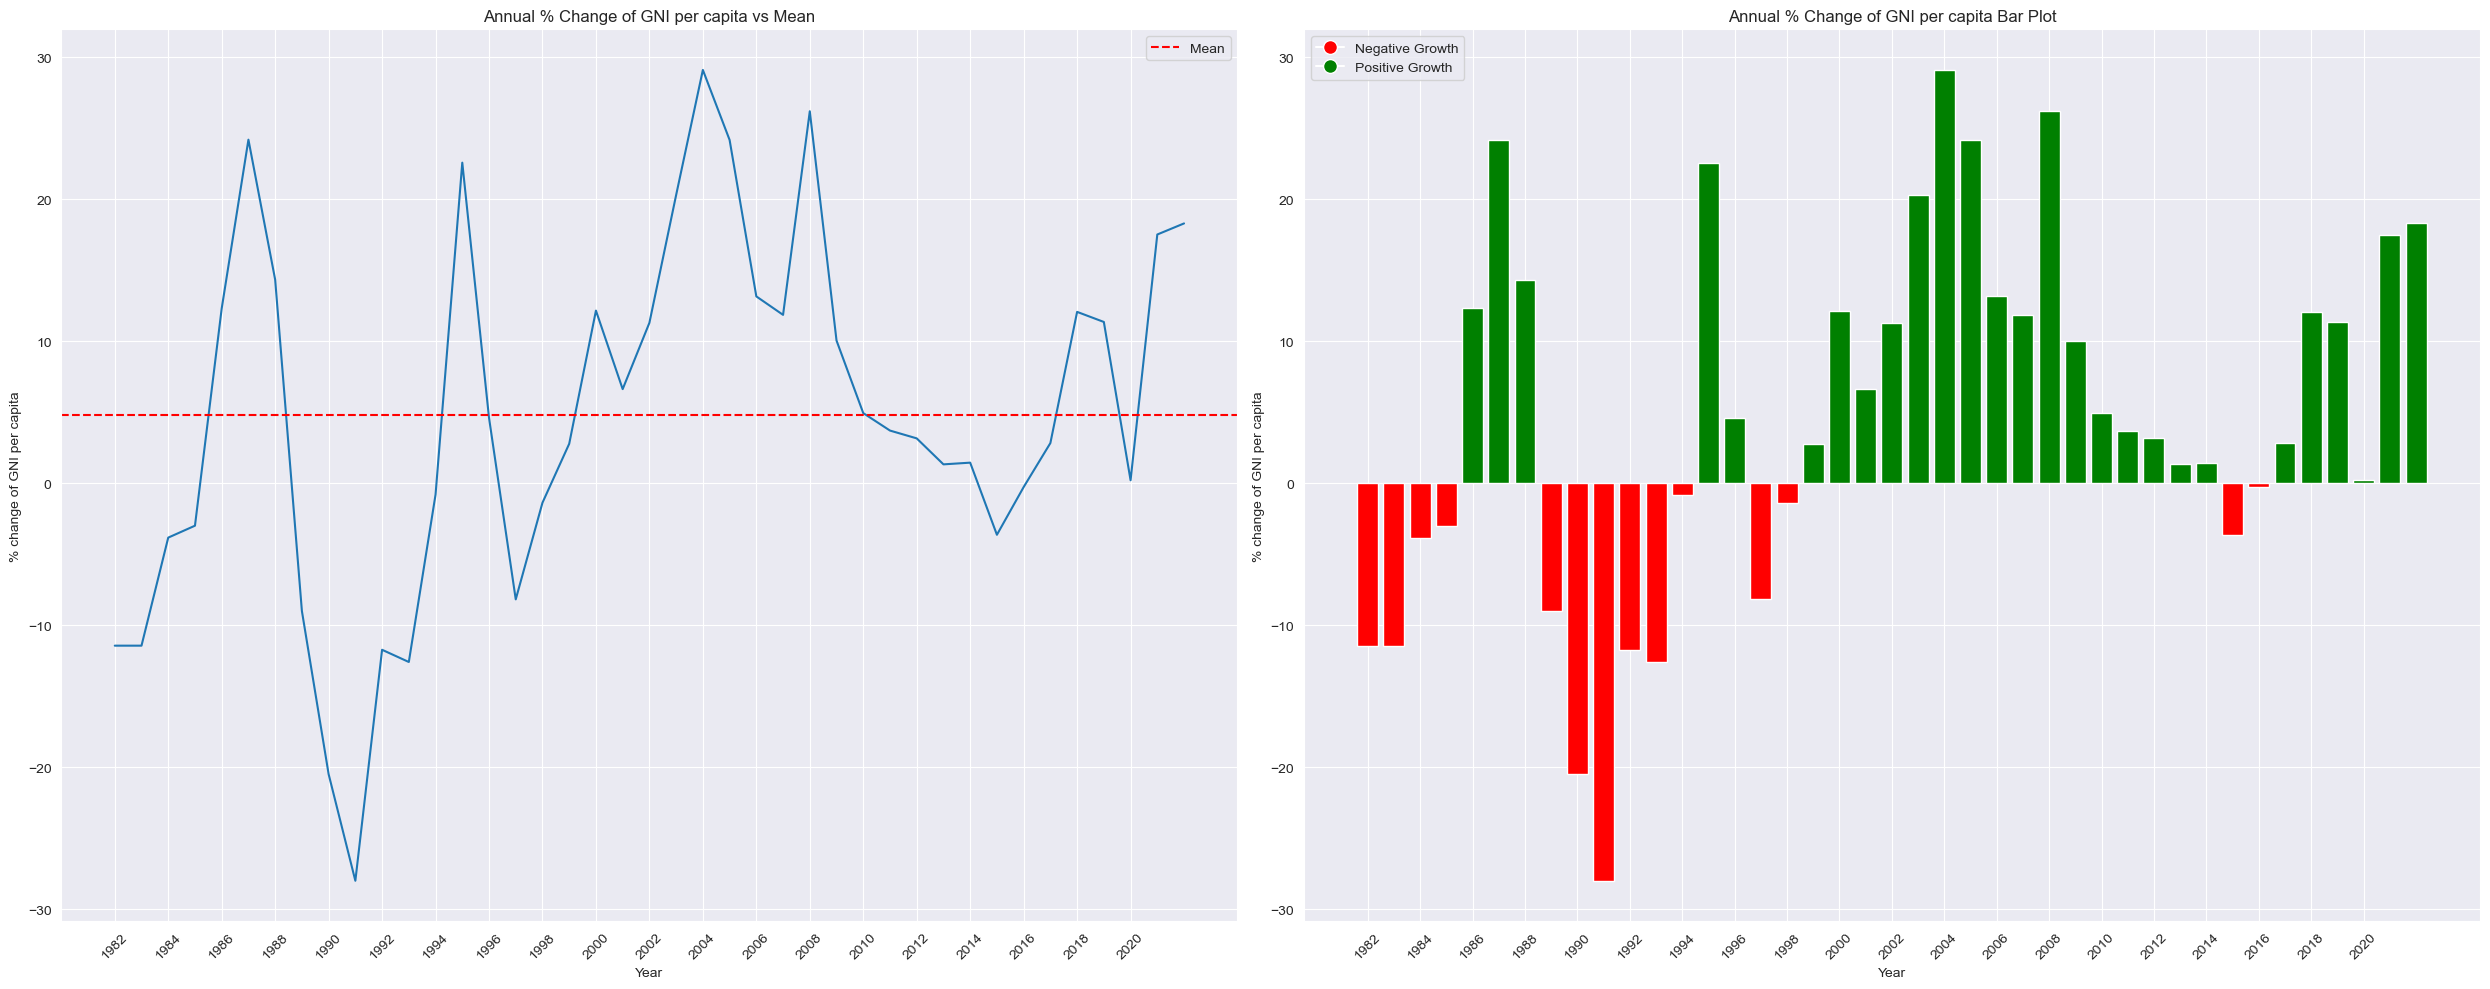

In [37]:
gni_per_capita_pct_change_mean, gni_per_capita_pct_change_std = plot_changes(gni_per_capita_data, 'date',
                                                                             'annual_pct_growth',
                                                                             'Annual % Change of GNI per capita',
                                                                             'Year', '% change of GNI per capita')

In [38]:
print(f'Mean value of the annual % changes of GNI: {gni_per_capita_pct_change_mean}')
print(f'Standard deviation value of the annual % changes of GNI: {gni_per_capita_pct_change_std}')

Mean value of the annual % changes of GNI: 4.80219512195122
Standard deviation value of the annual % changes of GNI: 12.96796832819141


### Inflation Rate ###

In [39]:
inflation_rate_data['annual_pct_change'] = inflation_rate_data['inflation_rate'].pct_change() * 100

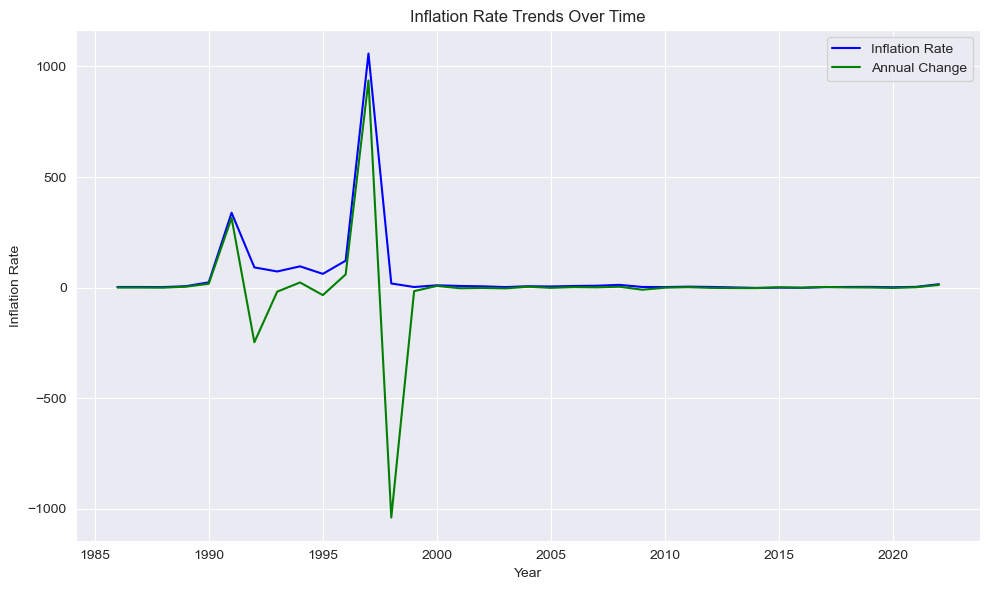

In [40]:
# Create a figure and axis for the plots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the inflation rate
ax.plot(inflation_rate_data.index, inflation_rate_data['inflation_rate'], label='Inflation Rate', color='blue')

# Plotting the annual change in inflation rate
ax.plot(inflation_rate_data.index, inflation_rate_data['annual_change'], label='Annual Change', color='green')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate')
ax.set_title('Inflation Rate Trends Over Time')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

To address the issue of large fluctuations in the inflation rates before 2000 causing the graphic after 2000 to appear flat, I consider using rolling averages to smooth out the fluctuations and highlight underlying trends.

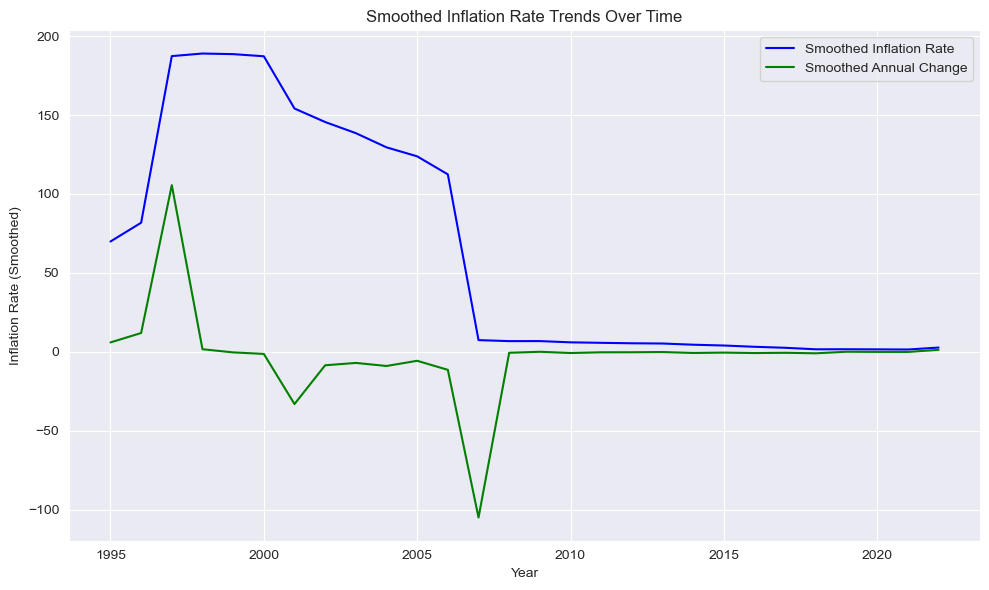

In [41]:
# Calculate rolling averages to smooth out fluctuations
rolling_window = 10  # Adjust the rolling window size as needed
inflation_rate_data['inflation_rate_rolling'] = inflation_rate_data['inflation_rate'].rolling(rolling_window).mean()
inflation_rate_data['annual_change_rolling'] = inflation_rate_data['annual_change'].rolling(rolling_window).mean()
inflation_rate_data['annual_pct_change_rolling'] = inflation_rate_data['annual_pct_change'].rolling(
    rolling_window).mean()

# Create a figure and axis for the plots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the smoothed inflation rate
ax.plot(inflation_rate_data.index, inflation_rate_data['inflation_rate_rolling'], label='Smoothed Inflation Rate',
        color='blue')

# Plotting the smoothed annual change in inflation rate
ax.plot(inflation_rate_data.index, inflation_rate_data['annual_change_rolling'], label='Smoothed Annual Change',
        color='green')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate (Smoothed)')
ax.set_title('Smoothed Inflation Rate Trends Over Time')
ax.legend()

# Use a logarithmic scale for the y-axis
# ax.set_yscale('log')

# Display the plot
plt.tight_layout()
plt.show()

Also, lets view the chart after 2000 only:

In [42]:
# Keep data from the year 2000 forward
inflation_from_2000 = inflation_rate_data[inflation_rate_data.index >= 2000].copy()
inflation_from_2000

,inflation_rate,annual_change,annual_pct_change,inflation_rate_rolling,annual_change_rolling,annual_pct_change_rolling
date,,,,,,
2000,10.3163,7.74,300.944423,187.22805,-1.348,220.803749
2001,7.3609,-2.96,-28.647868,154.11923,-33.109,85.733458
2002,5.8101,-1.55,-21.068076,145.57045,-8.549,90.929113
2003,2.3486,-3.46,-59.577288,138.51743,-7.053,86.988857
2004,6.1471,3.80,161.734650,129.52641,-8.991,99.981904
2005,5.0388,-1.11,-18.029640,123.82481,-5.702,101.718755
2006,7.2616,2.22,44.113678,112.39022,-11.435,96.533331
2007,8.4025,1.14,15.711413,7.39311,-104.998,21.072537
2008,12.3487,3.95,46.964594,6.76076,-0.633,35.592573


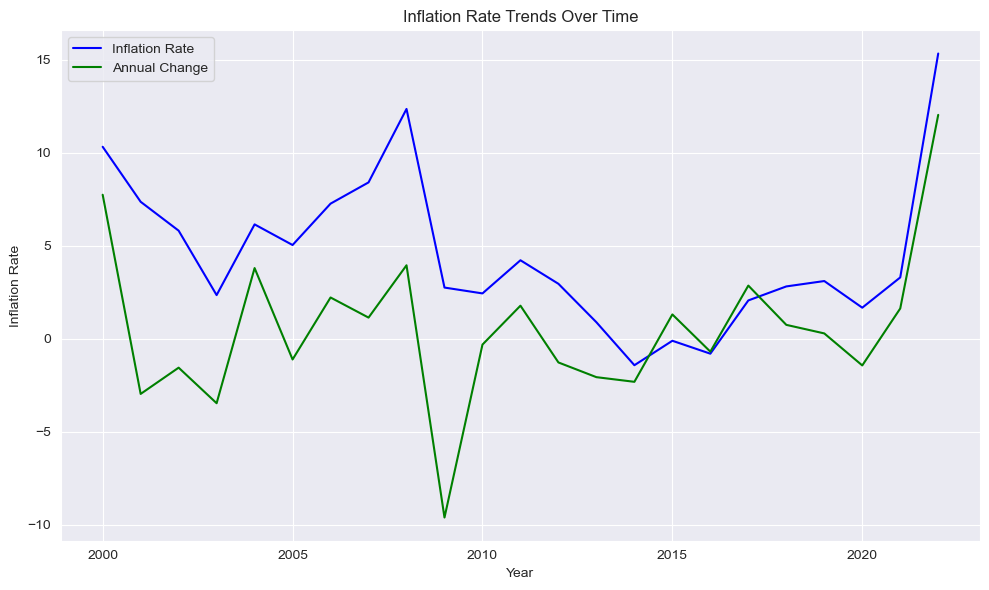

In [43]:

# Create a figure and axis for the plots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the inflation rate
ax.plot(inflation_from_2000.index, inflation_from_2000['inflation_rate'], label='Inflation Rate', color='blue')

# Plotting the annual change in inflation rate
ax.plot(inflation_from_2000.index, inflation_from_2000['annual_change'], label='Annual Change', color='green')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate')
ax.set_title('Inflation Rate Trends Over Time')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

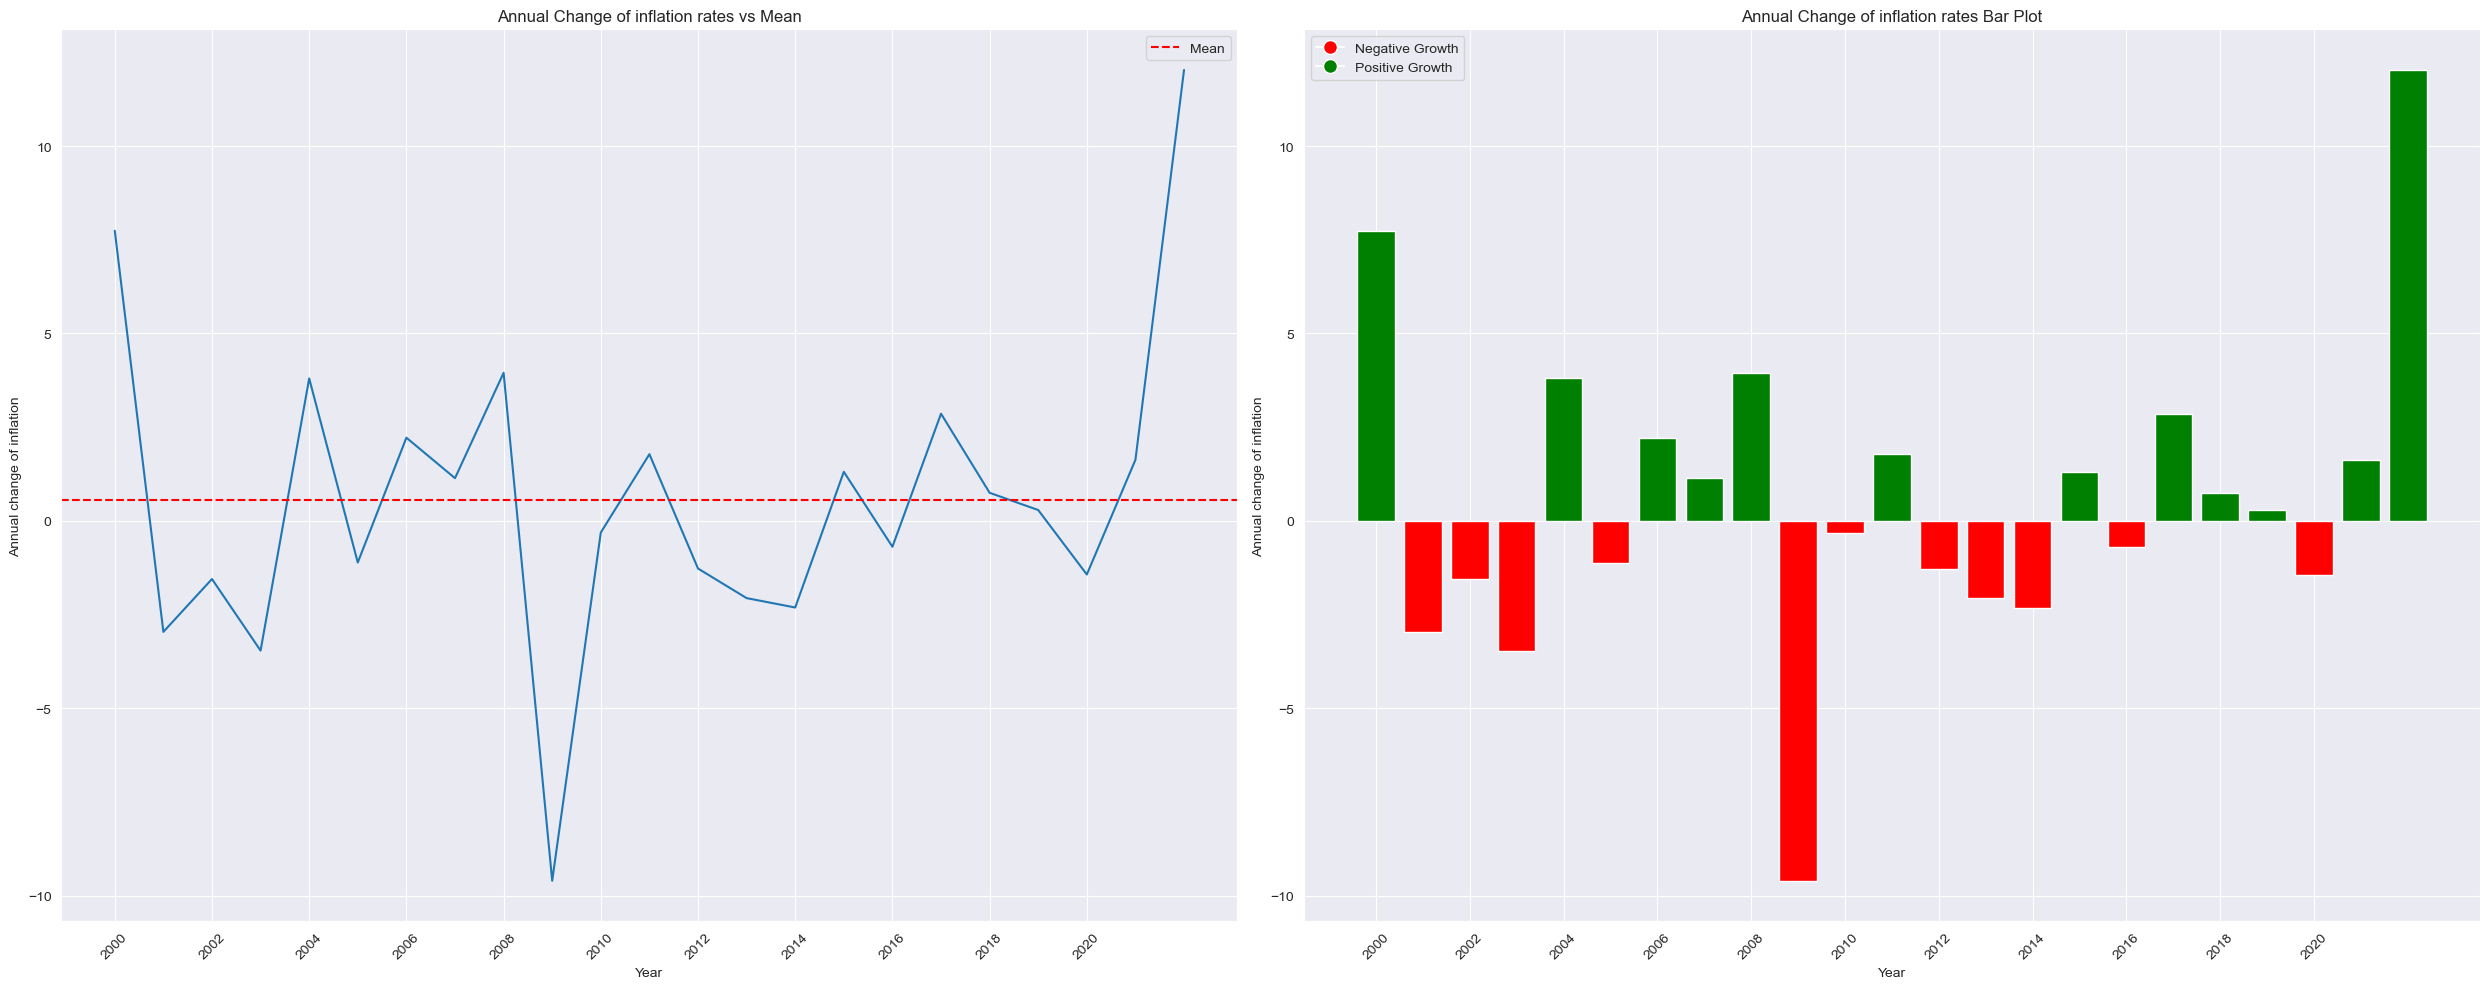

In [44]:
inflation_annual_change_mean, inflation_annual_change_std = plot_changes(inflation_from_2000, 'date', 'annual_change',
                                                                         'Annual Change of inflation rates',
                                                                         'Year', 'Annual change of inflation')

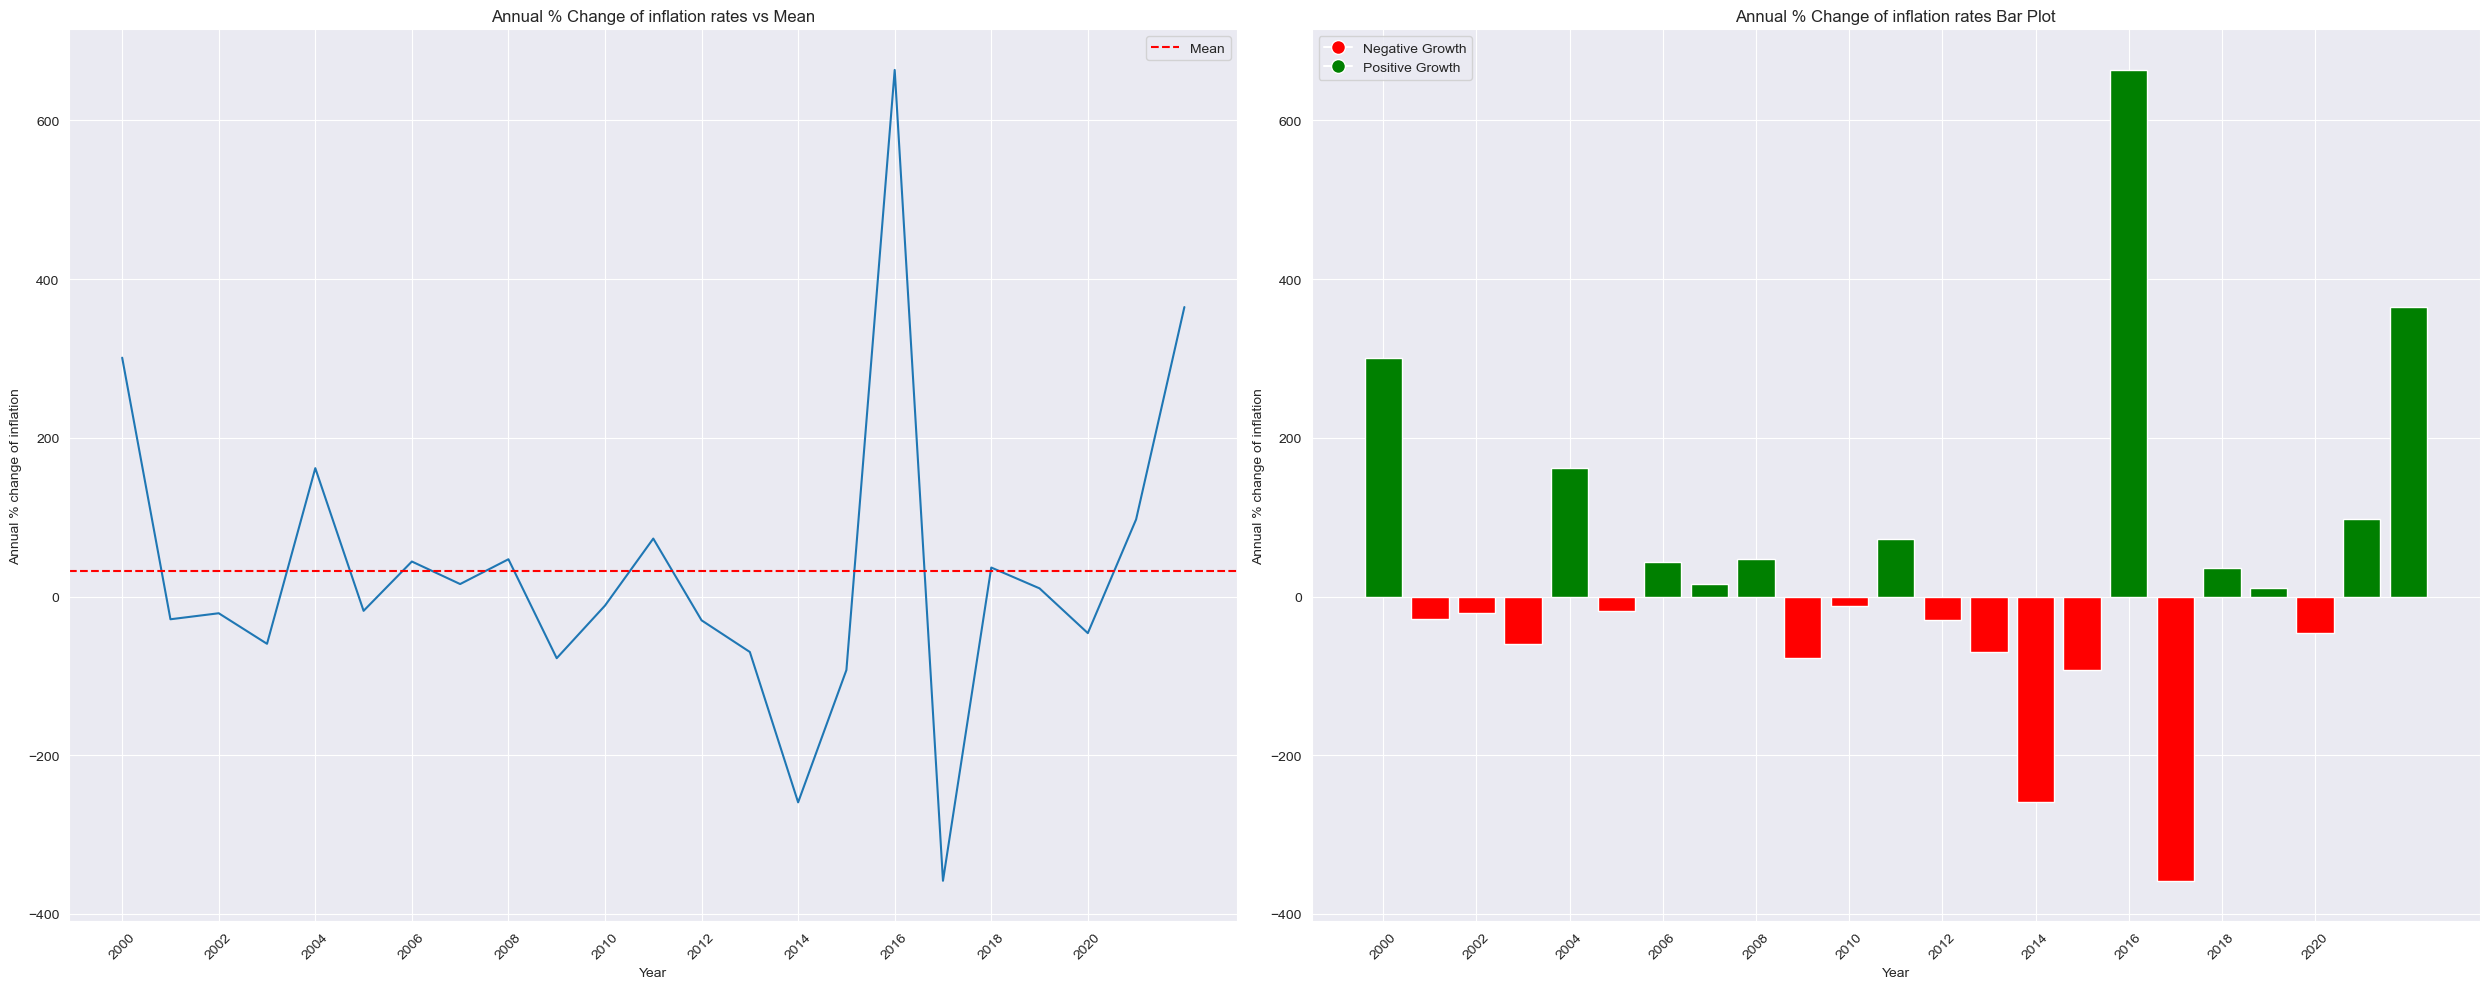

In [45]:
inflation_annual_pct_change_mean, inflation_annual_pct_change_std = plot_changes(inflation_from_2000, 'date',
                                                                                 'annual_pct_change',
                                                                                 'Annual % Change of inflation rates',
                                                                                 'Year', 'Annual % change of inflation')

In [46]:

min_inflation = inflation_from_2000['inflation_rate'].min()
max_inflation = inflation_from_2000['inflation_rate'].max()

year_of_min_inflation = inflation_from_2000[inflation_from_2000['inflation_rate'] == min_inflation].index[0]
year_of_max_inflation = inflation_from_2000[inflation_from_2000['inflation_rate'] == max_inflation].index[0]

print(f"Minimum inflation rate: {min_inflation:.2f}% in {year_of_min_inflation}")
print(f"Maximum inflation rate: {max_inflation:.2f}% in {year_of_max_inflation}")

Minimum inflation rate: -1.42% in 2014
Maximum inflation rate: 15.33% in 2022


The minimum inflation rate observed in the dataset is -1.42%.
This negative inflation rate suggests that there was deflation in the economy during that period. Deflation occurs when the general price level of goods and services decreases over time, leading to an increase in purchasing power. This can sometimes be indicative of economic challenges, such as reduced consumer spending or weak demand

The maximum inflation rate observed in the dataset is 15.33%.
This high inflation rate indicates a significant increase in the general price level of goods and services. High inflation can lead to reduced purchasing power, eroding the value of money. It can also disrupt economic stability and impact the cost of living for individuals.

In [47]:
print(f'Mean value of the annual changes of inflation after 2000: {inflation_annual_pct_change_mean}')
print(f'Standard deviation value of the annual changes of inflation after 2000: {inflation_annual_change_std}')

Mean value of the annual changes of inflation after 2000: 32.26748313300745
Standard deviation value of the annual changes of inflation after 2000: 4.158978049830551


In [48]:
print(f'Mean value of the annual % changes of inflation after 2000: {inflation_annual_change_mean}')
print(f'Standard deviation value of the annual % changes of inflation after 2000: {inflation_annual_pct_change_std}')

Mean value of the annual % changes of inflation after 2000: 0.5543478260869567
Standard deviation value of the annual % changes of inflation after 2000: 203.37419227681104


The mean value of the annual changes of inflation after the year 2000 is approximately 0.55%.
This positive mean suggests that, on average, there has been a small positive inflationary trend in the economy during this period. In other words, prices for goods and services have, on average, increased slightly over time.

The standard deviation value of the annual changes of inflation after the year 2000 is approximately 4.16%.
The higher standard deviation indicates that there has been a relatively wide variation in the annual changes of inflation during this period. This variation could be due to various factors such as economic shocks, policy changes, external influences, or other uncertainties that impact price levels.

## 3. Correlation analysis of macroeconomic data ##
Examine correlations between GDP growth rate and other economic indicators, such as GDP per capita, debt-to-GDP ratio, inflation rate, and GNI. Correlations can help identify relationships and dependencies between these indicators and GDP growth rate variability. For example, a high positive correlation between debt-to-GDP ratio and GDP growth variability might suggest that higher debt levels contribute to economic instability

In [49]:
cut_year = 1999

In [50]:
gdp_growth_data_cut = gdp_growth_data[gdp_growth_data.index >= cut_year]
gdp_growth_data_cut.rename(columns={'annual_change': 'gdp_growth_annual_change'}, inplace=True)
gdp_growth_data_cut

C:\Users\user\AppData\Local\Temp\ipykernel_1676\2262125075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_growth_data_cut.rename(columns={'annual_change': 'gdp_growth_annual_change'}, inplace=True)


,gdp_growth_pct,gdp_growth_annual_change
date,,
1999,-8.3961,-12.19
2000,4.5872,12.98
2001,3.8237,-0.76
2002,5.8719,2.05
2003,5.2372,-0.63
2004,6.5104,1.27
2005,7.0563,0.55
2006,6.8026,-0.25
2007,6.5914,-0.21


In [51]:
gdp_per_capita_data_cut = gdp_per_capita_data[gdp_per_capita_data.index >= cut_year][
    ['gdp_per_capita_usd', 'annual_growth_rate']]
gdp_per_capita_data_cut.rename(columns={'annual_growth_rate': 'gdp_per_capita_annual_growth_rate'}, inplace=True)
gdp_per_capita_data_cut

,gdp_per_capita_usd,gdp_per_capita_annual_growth_rate
date,,
1999,1659.7186,-8.829127
2000,1621.2621,-2.317049
2001,1770.9068,9.230136
2002,2092.9829,18.187072
2003,2719.4949,29.933928
2004,3389.6876,24.644014
2005,3899.8251,15.049691
2006,4523.1475,15.983342
2007,5888.7769,30.192016


In [52]:
debt_to_gdp_data_cut = gdp_per_capita_data[gdp_per_capita_data.index >= cut_year][['annual_growth_rate']]
debt_to_gdp_data_cut.rename(columns={'annual_growth_rate': 'debt_to_gdp_annual_growth_rate'}, inplace=True)
debt_to_gdp_data_cut

,debt_to_gdp_annual_growth_rate
date,
1999,-8.829127
2000,-2.317049
2001,9.230136
2002,18.187072
2003,29.933928
2004,24.644014
2005,15.049691
2006,15.983342
2007,30.192016


In [53]:
inflation_rate_data_cut = inflation_rate_data[inflation_rate_data.index >= cut_year][
    ['inflation_rate', 'annual_change', 'annual_pct_change']]
inflation_rate_data_cut.rename(
    columns={'annual_change': 'inflation_annual_change', 'annual_pct_change': 'inflation_annual_pct_change'},
    inplace=True)
inflation_rate_data_cut

,inflation_rate,inflation_annual_change,inflation_annual_pct_change
date,,,
1999,2.5730,-16.10,-86.220156
2000,10.3163,7.74,300.944423
2001,7.3609,-2.96,-28.647868
2002,5.8101,-1.55,-21.068076
2003,2.3486,-3.46,-59.577288
2004,6.1471,3.80,161.734650
2005,5.0388,-1.11,-18.029640
2006,7.2616,2.22,44.113678
2007,8.4025,1.14,15.711413


In [54]:
gni_data_cut = gni_data[gni_data.index >= cut_year][['gni_billions_usd', 'per_capita_usd', 'annual_pct_growth']]
gni_data_cut.rename(columns={'per_capita_usd': 'gni_per_capita_usd', 'annual_pct_growth': 'gni_annual_pct_growth'},
                    inplace=True)
gni_data_cut

,gni_billions_usd,gni_per_capita_usd,gni_annual_pct_growth
date,,,
1999,12.146867,1480.0,2.450164
2000,13.562745,1660.0,11.656323
2001,14.192525,1770.0,4.643452
2002,15.421103,1970.0,8.656519
2003,18.444532,2370.0,19.605787
2004,23.597394,3060.0,27.937070
2005,29.128687,3800.0,23.440274
2006,32.658104,4300.0,12.116635
2007,36.321165,4810.0,11.216391


In [55]:
# Merge the datasets based on their common index (date)
merged_data_macroeconomic = gdp_growth_data_cut.merge(gdp_per_capita_data_cut, left_index=True, right_index=True)
merged_data_macroeconomic = merged_data_macroeconomic.merge(debt_to_gdp_data_cut, left_index=True, right_index=True)
merged_data_macroeconomic = merged_data_macroeconomic.merge(inflation_rate_data_cut, left_index=True, right_index=True)
merged_data_macroeconomic = merged_data_macroeconomic.merge(gni_data_cut, left_index=True, right_index=True)
merged_data_macroeconomic

,gdp_growth_pct,gdp_growth_annual_change,gdp_per_capita_usd,gdp_per_capita_annual_growth_rate,debt_to_gdp_annual_growth_rate,inflation_rate,inflation_annual_change,inflation_annual_pct_change,gni_billions_usd,gni_per_capita_usd,gni_annual_pct_growth
date,,,,,,,,,,,
1999,-8.3961,-12.19,1659.7186,-8.829127,-8.829127,2.5730,-16.10,-86.220156,12.146867,1480.0,2.450164
2000,4.5872,12.98,1621.2621,-2.317049,-2.317049,10.3163,7.74,300.944423,13.562745,1660.0,11.656323
2001,3.8237,-0.76,1770.9068,9.230136,9.230136,7.3609,-2.96,-28.647868,14.192525,1770.0,4.643452
2002,5.8719,2.05,2092.9829,18.187072,18.187072,5.8101,-1.55,-21.068076,15.421103,1970.0,8.656519
2003,5.2372,-0.63,2719.4949,29.933928,29.933928,2.3486,-3.46,-59.577288,18.444532,2370.0,19.605787
2004,6.5104,1.27,3389.6876,24.644014,24.644014,6.1471,3.80,161.734650,23.597394,3060.0,27.937070
2005,7.0563,0.55,3899.8251,15.049691,15.049691,5.0388,-1.11,-18.029640,29.128687,3800.0,23.440274
2006,6.8026,-0.25,4523.1475,15.983342,15.983342,7.2616,2.22,44.113678,32.658104,4300.0,12.116635
2007,6.5914,-0.21,5888.7769,30.192016,30.192016,8.4025,1.14,15.711413,36.321165,4810.0,11.216391


In [56]:
# Calculate correlation coefficients
correlation_matrix = merged_data_macroeconomic.corr()

# Print the correlation matrix
print(correlation_matrix)

                                   gdp_growth_pct  gdp_growth_annual_change  \
gdp_growth_pct                           1.000000                  0.692391   
gdp_growth_annual_change                 0.692391                  1.000000   
gdp_per_capita_usd                      -0.046817                 -0.010586   
gdp_per_capita_annual_growth_rate        0.694636                  0.198685   
debt_to_gdp_annual_growth_rate           0.694636                  0.198685   
inflation_rate                           0.403498                  0.107136   
inflation_annual_change                  0.654456                  0.566650   
inflation_annual_pct_change              0.248686                  0.207901   
gni_billions_usd                        -0.082250                 -0.001854   
gni_per_capita_usd                      -0.076554                 -0.006133   
gni_annual_pct_growth                    0.593169                  0.222278   

                                   gdp_per_capita_u

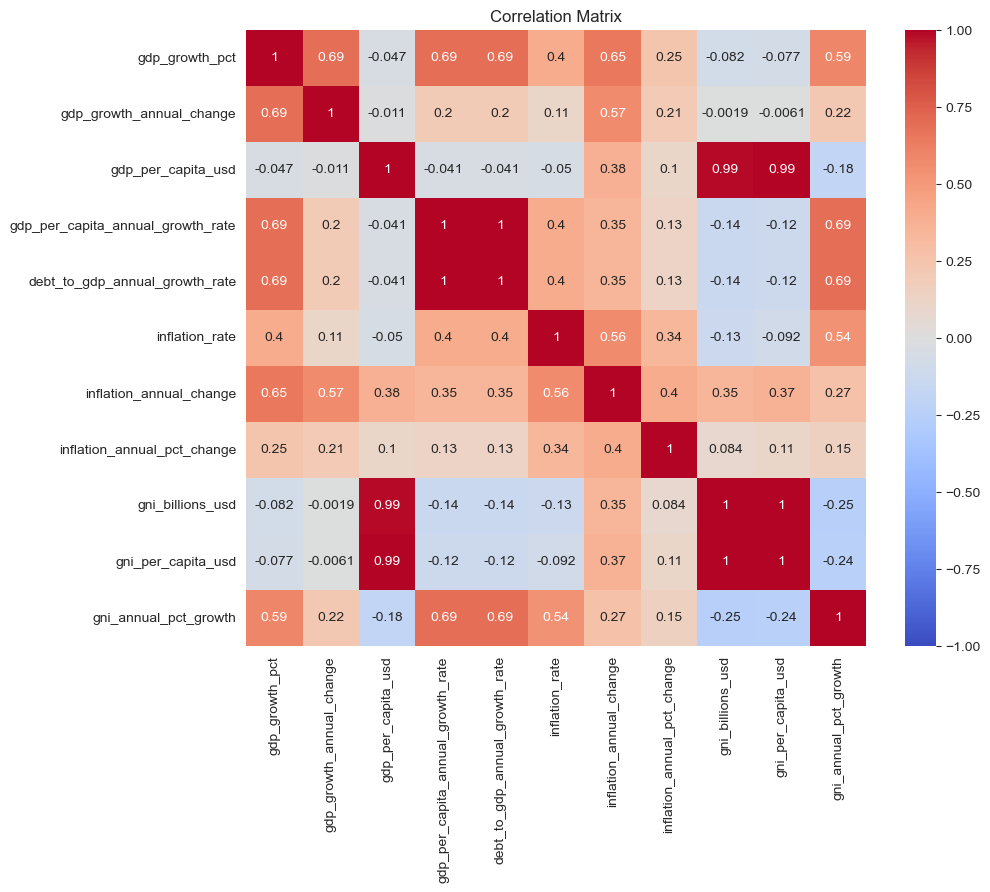

In [57]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Set plot title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

GDP per capita one of the most valuable indicators for assessing the economy's real productivity. GDP per capita divides the GDP by the total population, giving an average economic output per person. It provides a measure of the average standard of living and economic well-being of the population.

Let's see which are the most correlated indicators with GDP per capita.

In [58]:
def get_most_correlated_indicators(correlation_matrix, n, indicator_name):
    correlations_with_indicator = correlation_matrix[indicator_name].drop(indicator_name)
    most_correlated = correlations_with_indicator.abs().sort_values(ascending=False).head(n)
    return most_correlated.index.tolist()


# Example usage
n = 5  # Number of most correlated indicators
indicator_name = 'gdp_per_capita_usd'  # Replace with the indicator you're interested in
most_correlated = get_most_correlated_indicators(correlation_matrix, n, indicator_name)
print(f"The {n} most correlated indicators with '{indicator_name}' are:")
print(most_correlated)


The 5 most correlated indicators with 'gdp_per_capita_usd' are:
['gni_per_capita_usd', 'gni_billions_usd', 'inflation_annual_change', 'gni_annual_pct_growth', 'inflation_annual_pct_change']


In [59]:
correlation_with_gdp_per_capita = correlation_matrix.loc[indicator_name, most_correlated]
correlation_with_gdp_per_capita

gni_per_capita_usd             0.993307
gni_billions_usd               0.990434
inflation_annual_change        0.380068
gni_annual_pct_growth         -0.183166
inflation_annual_pct_change    0.102578
Name: gdp_per_capita_usd, dtype: float64

In [60]:
merged_data_macroeconomic.describe()

,gdp_growth_pct,gdp_growth_annual_change,gdp_per_capita_usd,gdp_per_capita_annual_growth_rate,debt_to_gdp_annual_growth_rate,inflation_rate,inflation_annual_change,inflation_annual_pct_change,gni_billions_usd,gni_per_capita_usd,gni_annual_pct_growth
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.863471,-0.018750,6587.332558,9.397793,9.397793,4.450758,-0.139583,27.330498,44.865923,6231.250000,8.911801
std,3.885820,5.383942,3330.228420,11.694048,11.694048,4.085709,5.301134,200.368976,20.854204,3171.954976,8.694416
min,-8.396100,-12.190000,1621.262100,-10.507628,-10.507628,-1.418200,-16.100000,-358.151766,12.146867,1480.000000,-4.142474
25%,1.398075,-0.900000,3772.290725,1.636564,1.636564,2.276850,-1.677500,-62.151490,27.745864,3615.000000,2.390372
50%,3.394700,-0.230000,7176.203750,9.978003,9.978003,3.029150,-0.010000,-14.720907,52.318570,7140.000000,9.011272
75%,5.932925,1.395000,8031.037675,16.534275,16.534275,6.425725,1.890000,53.477853,55.307266,7642.500000,11.771401
max,7.634600,12.980000,13772.476800,30.192016,30.192016,15.325300,12.030000,663.479924,85.661662,13250.000000,27.937070


In [61]:
merged_data_macroeconomic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1999 to 2022
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gdp_growth_pct                     24 non-null     float64
 1   gdp_growth_annual_change           24 non-null     float64
 2   gdp_per_capita_usd                 24 non-null     float64
 3   gdp_per_capita_annual_growth_rate  24 non-null     float64
 4   debt_to_gdp_annual_growth_rate     24 non-null     float64
 5   inflation_rate                     24 non-null     float64
 6   inflation_annual_change            24 non-null     float64
 7   inflation_annual_pct_change        24 non-null     float64
 8   gni_billions_usd                   24 non-null     float64
 9   gni_per_capita_usd                 24 non-null     float64
 10  gni_annual_pct_growth              24 non-null     float64
dtypes: float64(11)
memory usage: 2.8 KB


### Perform ADF test for stationarity on the columns ###

In [62]:
from statsmodels.tsa.stattools import adfuller


def check_indicator_stationarity(df, column_name):
    print(column_name + " ADF stats:\n")
    result = adfuller(df[column_name])
    p_value = result[1]
    print("ADF Statistic:", result[0])
    print("p-value:", p_value)
    print("Critical Values:", result[4])
    return p_value


def normalize_column(df, column_name):
    mean = df[column_name].mean()
    std = df[column_name].std()
    df[column_name + '_norm'] = (df[column_name] - mean) / std
    return df


check_indicator_stationarity(merged_data_macroeconomic, 'gdp_per_capita_usd')
check_indicator_stationarity(merged_data_macroeconomic, 'gni_per_capita_usd')
check_indicator_stationarity(merged_data_macroeconomic, 'gni_billions_usd')
check_indicator_stationarity(merged_data_macroeconomic, 'inflation_annual_change')
check_indicator_stationarity(merged_data_macroeconomic, 'gni_annual_pct_growth')
check_indicator_stationarity(merged_data_macroeconomic, 'inflation_annual_pct_change')

gdp_per_capita_usd ADF stats:

ADF Statistic: 2.202957290797958
p-value: 0.9988849294744654
Critical Values: {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}
gni_per_capita_usd ADF stats:

ADF Statistic: 1.0533724717435424
p-value: 0.9947983550509161
Critical Values: {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}
gni_billions_usd ADF stats:

ADF Statistic: -0.631541608130064
p-value: 0.863694469073798
Critical Values: {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}
inflation_annual_change ADF stats:

ADF Statistic: -7.410949559653195
p-value: 7.136805042449883e-11
Critical Values: {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}
gni_annual_pct_growth ADF stats:

ADF Statistic: -3.468845559716827
p-value: 0.008824196515315226
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
inflation_annual_pct_change ADF s

4.3317301611469265e-05

Interpretation:

ADF Statistic: The positive ADF statistic indicates that the observed ADF statistic is larger than some of the critical values, but it's essential to compare it with the critical values to draw conclusions.

p-value: The high p-value (0.9988849294744655) suggests that there is weak evidence against the null hypothesis of non-stationarity. In other words, the data is likely non-stationary.

Critical Values: The critical values you've provided are all negative. Generally, the ADF statistic should be more negative than the critical values for the null hypothesis of non-stationarity to be rejected.

### Preprocessing for Predictive Modeling ###

We will build our model using the 5 most correlated features: ['gni_per_capita_usd', 'gni_billions_usd', 'inflation_annual_change', 'gni_annual_pct_growth', 'inflation_annual_pct_change']. It's widely known that correlation does not mean causation, but for the sake of simplicity, we use these columns to reduce the dataset.

First, lets get our data ready for a time-series model!

Normalize the data

In [63]:
mean = merged_data_macroeconomic['gdp_per_capita_usd'].mean()
std = merged_data_macroeconomic['gdp_per_capita_usd'].std()
merged_data_macroeconomic = normalize_column(merged_data_macroeconomic, 'gdp_per_capita_usd')
first_value = merged_data_macroeconomic['gdp_per_capita_usd_norm'][1999]
merged_data_macroeconomic = normalize_column(merged_data_macroeconomic, 'gni_per_capita_usd')
merged_data_macroeconomic = normalize_column(merged_data_macroeconomic, 'gni_billions_usd')
merged_data_macroeconomic = normalize_column(merged_data_macroeconomic, 'inflation_annual_change')
merged_data_macroeconomic = normalize_column(merged_data_macroeconomic, 'gni_annual_pct_growth')
merged_data_macroeconomic = normalize_column(merged_data_macroeconomic, 'inflation_annual_pct_change')
merged_data_macroeconomic

,gdp_growth_pct,gdp_growth_annual_change,gdp_per_capita_usd,gdp_per_capita_annual_growth_rate,debt_to_gdp_annual_growth_rate,inflation_rate,inflation_annual_change,inflation_annual_pct_change,gni_billions_usd,gni_per_capita_usd,gni_annual_pct_growth,gdp_per_capita_usd_norm,gni_per_capita_usd_norm,gni_billions_usd_norm,inflation_annual_change_norm,gni_annual_pct_growth_norm,inflation_annual_pct_change_norm
date,,,,,,,,,,,,,,,,,
1999,-8.3961,-12.19,1659.7186,-8.829127,-8.829127,2.5730,-16.10,-86.220156,12.146867,1480.0,2.450164,-1.479662,-1.497893,-1.568943,-3.010755,-0.743194,-0.566708
2000,4.5872,12.98,1621.2621,-2.317049,-2.317049,10.3163,7.74,300.944423,13.562745,1660.0,11.656323,-1.491210,-1.441146,-1.501049,1.486396,0.315665,1.365550
2001,3.8237,-0.76,1770.9068,9.230136,9.230136,7.3609,-2.96,-28.647868,14.192525,1770.0,4.643452,-1.446275,-1.406467,-1.470850,-0.532040,-0.490930,-0.279376
2002,5.8719,2.05,2092.9829,18.187072,18.187072,5.8101,-1.55,-21.068076,15.421103,1970.0,8.656519,-1.349562,-1.343414,-1.411937,-0.266059,-0.029362,-0.241547
2003,5.2372,-0.63,2719.4949,29.933928,29.933928,2.3486,-3.46,-59.577288,18.444532,2370.0,19.605787,-1.161433,-1.217309,-1.266958,-0.626360,1.229983,-0.433739
2004,6.5104,1.27,3389.6876,24.644014,24.644014,6.1471,3.80,161.734650,23.597394,3060.0,27.937070,-0.960188,-0.999778,-1.019868,0.743159,2.188217,0.670783
2005,7.0563,0.55,3899.8251,15.049691,15.049691,5.0388,-1.11,-18.029640,29.128687,3800.0,23.440274,-0.807004,-0.766483,-0.754631,-0.183058,1.671012,-0.226383
2006,6.8026,-0.25,4523.1475,15.983342,15.983342,7.2616,2.22,44.113678,32.658104,4300.0,12.116635,-0.619833,-0.608852,-0.585389,0.445109,0.368608,0.083761
2007,6.5914,-0.21,5888.7769,30.192016,30.192016,8.4025,1.14,15.711413,36.321165,4810.0,11.216391,-0.209762,-0.448068,-0.409738,0.241379,0.265065,-0.057988


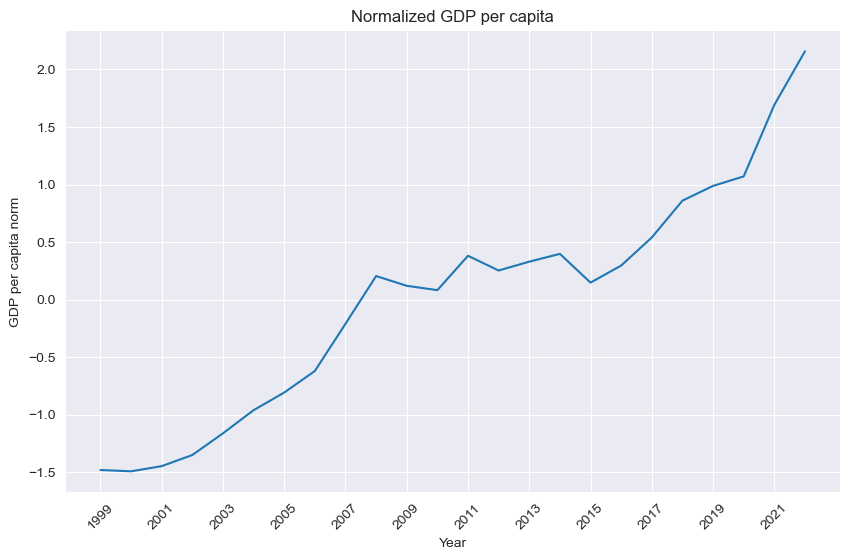

In [64]:
plot_line((10, 6), merged_data_macroeconomic, 'date', 'gdp_per_capita_usd_norm', 'Normalized GDP per capita', 'Year',
          'GDP per capita norm')

Calculate the difference between each consecutive data point. The formula for the first difference at time t is:

First Difference at t = Data at t - Data at (t-1)

In [65]:
merged_data_macroeconomic['gdp_per_capita_usd_norm_diff'] = merged_data_macroeconomic['gdp_per_capita_usd_norm'].diff()
merged_data_macroeconomic['gni_per_capita_usd_norm_diff'] = merged_data_macroeconomic['gni_per_capita_usd_norm'].diff()
merged_data_macroeconomic['gni_billions_usd_norm_diff'] = merged_data_macroeconomic['gni_billions_usd_norm'].diff()
# merged_data_macroeconomic['inflation_annual_change_norm_diff'] = merged_data_macroeconomic['inflation_annual_change_norm'].diff() its already stationary
merged_data_macroeconomic['gni_annual_pct_growth_norm_diff'] = merged_data_macroeconomic[
    'gni_annual_pct_growth_norm'].diff()
# merged_data_macroeconomic['inflation_annual_pct_change_norm_diff'] = merged_data_macroeconomic['inflation_annual_pct_change_norm'].diff() already stationary
merged_data_macroeconomic

,gdp_growth_pct,gdp_growth_annual_change,gdp_per_capita_usd,gdp_per_capita_annual_growth_rate,debt_to_gdp_annual_growth_rate,inflation_rate,inflation_annual_change,inflation_annual_pct_change,gni_billions_usd,gni_per_capita_usd,...,gdp_per_capita_usd_norm,gni_per_capita_usd_norm,gni_billions_usd_norm,inflation_annual_change_norm,gni_annual_pct_growth_norm,inflation_annual_pct_change_norm,gdp_per_capita_usd_norm_diff,gni_per_capita_usd_norm_diff,gni_billions_usd_norm_diff,gni_annual_pct_growth_norm_diff
date,,,,,,,,,,,,,,,,,,,,,
1999,-8.3961,-12.19,1659.7186,-8.829127,-8.829127,2.5730,-16.10,-86.220156,12.146867,1480.0,...,-1.479662,-1.497893,-1.568943,-3.010755,-0.743194,-0.566708,NaN,NaN,NaN,NaN
2000,4.5872,12.98,1621.2621,-2.317049,-2.317049,10.3163,7.74,300.944423,13.562745,1660.0,...,-1.491210,-1.441146,-1.501049,1.486396,0.315665,1.365550,-0.011548,0.056747,0.067894,1.058859
2001,3.8237,-0.76,1770.9068,9.230136,9.230136,7.3609,-2.96,-28.647868,14.192525,1770.0,...,-1.446275,-1.406467,-1.470850,-0.532040,-0.490930,-0.279376,0.044935,0.034679,0.030199,-0.806595
2002,5.8719,2.05,2092.9829,18.187072,18.187072,5.8101,-1.55,-21.068076,15.421103,1970.0,...,-1.349562,-1.343414,-1.411937,-0.266059,-0.029362,-0.241547,0.096713,0.063053,0.058913,0.461568
2003,5.2372,-0.63,2719.4949,29.933928,29.933928,2.3486,-3.46,-59.577288,18.444532,2370.0,...,-1.161433,-1.217309,-1.266958,-0.626360,1.229983,-0.433739,0.188129,0.126105,0.144979,1.259345
2004,6.5104,1.27,3389.6876,24.644014,24.644014,6.1471,3.80,161.734650,23.597394,3060.0,...,-0.960188,-0.999778,-1.019868,0.743159,2.188217,0.670783,0.201245,0.217531,0.247090,0.958234
2005,7.0563,0.55,3899.8251,15.049691,15.049691,5.0388,-1.11,-18.029640,29.128687,3800.0,...,-0.807004,-0.766483,-0.754631,-0.183058,1.671012,-0.226383,0.153184,0.233295,0.265236,-0.517205
2006,6.8026,-0.25,4523.1475,15.983342,15.983342,7.2616,2.22,44.113678,32.658104,4300.0,...,-0.619833,-0.608852,-0.585389,0.445109,0.368608,0.083761,0.187171,0.157631,0.169242,-1.302404
2007,6.5914,-0.21,5888.7769,30.192016,30.192016,8.4025,1.14,15.711413,36.321165,4810.0,...,-0.209762,-0.448068,-0.409738,0.241379,0.265065,-0.057988,0.410071,0.160784,0.175651,-0.103543


In [66]:
merged_data_macroeconomic.dropna(inplace=True)
merged_data_macroeconomic

,gdp_growth_pct,gdp_growth_annual_change,gdp_per_capita_usd,gdp_per_capita_annual_growth_rate,debt_to_gdp_annual_growth_rate,inflation_rate,inflation_annual_change,inflation_annual_pct_change,gni_billions_usd,gni_per_capita_usd,...,gdp_per_capita_usd_norm,gni_per_capita_usd_norm,gni_billions_usd_norm,inflation_annual_change_norm,gni_annual_pct_growth_norm,inflation_annual_pct_change_norm,gdp_per_capita_usd_norm_diff,gni_per_capita_usd_norm_diff,gni_billions_usd_norm_diff,gni_annual_pct_growth_norm_diff
date,,,,,,,,,,,,,,,,,,,,,
2000,4.5872,12.98,1621.2621,-2.317049,-2.317049,10.3163,7.74,300.944423,13.562745,1660.0,...,-1.491210,-1.441146,-1.501049,1.486396,0.315665,1.365550,-0.011548,0.056747,0.067894,1.058859
2001,3.8237,-0.76,1770.9068,9.230136,9.230136,7.3609,-2.96,-28.647868,14.192525,1770.0,...,-1.446275,-1.406467,-1.470850,-0.532040,-0.490930,-0.279376,0.044935,0.034679,0.030199,-0.806595
2002,5.8719,2.05,2092.9829,18.187072,18.187072,5.8101,-1.55,-21.068076,15.421103,1970.0,...,-1.349562,-1.343414,-1.411937,-0.266059,-0.029362,-0.241547,0.096713,0.063053,0.058913,0.461568
2003,5.2372,-0.63,2719.4949,29.933928,29.933928,2.3486,-3.46,-59.577288,18.444532,2370.0,...,-1.161433,-1.217309,-1.266958,-0.626360,1.229983,-0.433739,0.188129,0.126105,0.144979,1.259345
2004,6.5104,1.27,3389.6876,24.644014,24.644014,6.1471,3.80,161.734650,23.597394,3060.0,...,-0.960188,-0.999778,-1.019868,0.743159,2.188217,0.670783,0.201245,0.217531,0.247090,0.958234
2005,7.0563,0.55,3899.8251,15.049691,15.049691,5.0388,-1.11,-18.029640,29.128687,3800.0,...,-0.807004,-0.766483,-0.754631,-0.183058,1.671012,-0.226383,0.153184,0.233295,0.265236,-0.517205
2006,6.8026,-0.25,4523.1475,15.983342,15.983342,7.2616,2.22,44.113678,32.658104,4300.0,...,-0.619833,-0.608852,-0.585389,0.445109,0.368608,0.083761,0.187171,0.157631,0.169242,-1.302404
2007,6.5914,-0.21,5888.7769,30.192016,30.192016,8.4025,1.14,15.711413,36.321165,4810.0,...,-0.209762,-0.448068,-0.409738,0.241379,0.265065,-0.057988,0.410071,0.160784,0.175651,-0.103543
2008,6.1160,-0.48,7271.3052,23.477342,23.477342,12.3487,3.95,46.964594,45.491734,6070.0,...,0.205383,-0.050836,0.030009,0.771454,1.878994,0.097990,0.415145,0.397231,0.439747,1.613928


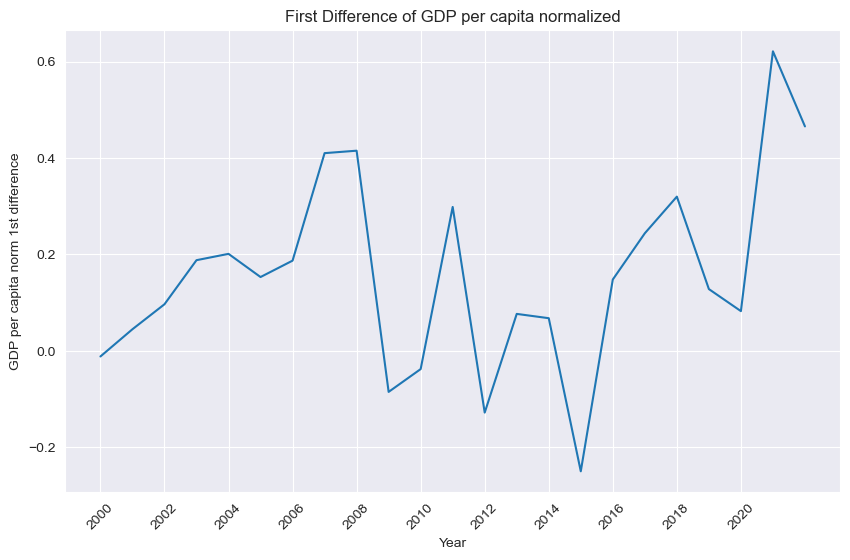

In [67]:
plot_line((10, 6), merged_data_macroeconomic, 'date', 'gdp_per_capita_usd_norm_diff',
          'First Difference of GDP per capita normalized', 'Year', 'GDP per capita norm 1st difference')

In [68]:
check_indicator_stationarity(merged_data_macroeconomic, 'gdp_per_capita_usd_norm_diff')
check_indicator_stationarity(merged_data_macroeconomic, 'gni_per_capita_usd_norm_diff')
check_indicator_stationarity(merged_data_macroeconomic, 'gni_billions_usd_norm_diff')
check_indicator_stationarity(merged_data_macroeconomic, 'inflation_annual_change_norm')
check_indicator_stationarity(merged_data_macroeconomic, 'gni_annual_pct_growth_norm_diff')
check_indicator_stationarity(merged_data_macroeconomic, 'inflation_annual_pct_change_norm')

gdp_per_capita_usd_norm_diff ADF stats:

ADF Statistic: -3.632366542366951
p-value: 0.005171558611852748
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
gni_per_capita_usd_norm_diff ADF stats:

ADF Statistic: -4.516456766414659
p-value: 0.00018360570321294264
Critical Values: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
gni_billions_usd_norm_diff ADF stats:

ADF Statistic: -8.784023398500741
p-value: 2.33487290312423e-14
Critical Values: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
inflation_annual_change_norm ADF stats:

ADF Statistic: -4.593007818073391
p-value: 0.00013305752793969303
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
gni_annual_pct_growth_norm_diff ADF stats:

ADF Statistic: -5.697091553524683
p-value: 7.828695462889443e-07
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10

6.179233188458624e-08

Interpretation:
The ADF statistic is significantly more negative than the critical values, and the p-value is very small. This suggests that you can confidently reject the null hypothesis of non-stationarity, indicating that the first difference of the 'gdp_per_capita_usd' time series is stationary. This is a positive outcome as stationarity is a requirement for many time series models, including VAR.

In [69]:
merged_data_macroeconomic_selected = merged_data_macroeconomic[
    ['gdp_per_capita_usd_norm_diff', 'gni_per_capita_usd_norm_diff', 'gni_billions_usd_norm_diff',
     'inflation_annual_change_norm', 'gni_annual_pct_growth_norm_diff', 'inflation_annual_pct_change_norm']]
merged_data_macroeconomic_selected

,gdp_per_capita_usd_norm_diff,gni_per_capita_usd_norm_diff,gni_billions_usd_norm_diff,inflation_annual_change_norm,gni_annual_pct_growth_norm_diff,inflation_annual_pct_change_norm
date,,,,,,
2000,-0.011548,0.056747,0.067894,1.486396,1.058859,1.365550
2001,0.044935,0.034679,0.030199,-0.532040,-0.806595,-0.279376
2002,0.096713,0.063053,0.058913,-0.266059,0.461568,-0.241547
2003,0.188129,0.126105,0.144979,-0.626360,1.259345,-0.433739
2004,0.201245,0.217531,0.247090,0.743159,0.958234,0.670783
2005,0.153184,0.233295,0.265236,-0.183058,-0.517205,-0.226383
2006,0.187171,0.157631,0.169242,0.445109,-1.302404,0.083761
2007,0.410071,0.160784,0.175651,0.241379,-0.103543,-0.057988
2008,0.415145,0.397231,0.439747,0.771454,1.613928,0.097990


In [70]:
# Specify the number of periods you want to forecast
n_forecast = 2  # For example, forecast 2 periods ahead

# Split the data into training and testing sets
train_data = merged_data_macroeconomic_selected.iloc[:-n_forecast]
test_data = merged_data_macroeconomic_selected.iloc[-n_forecast:]

## 4. Model Selection, Training and validation ##

Vector Autoregression (VAR) model:

VAR is an extension of ARIMA that considers multiple time series variables.
Since we have multiple feature columns, a VAR model could capture the interdependencies between GDP per capita and other economic indicators.
VAR models could be effective for short-term predictions.

In [71]:
from statsmodels.tsa.api import VAR

model = VAR(train_data)
model_fitted = model.fit()

forecast = model_fitted.forecast(train_data.values, steps=n_forecast)
forecast_df = pd.DataFrame(forecast, columns=merged_data_macroeconomic_selected.columns)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [72]:
forecast_df

,gdp_per_capita_usd_norm_diff,gni_per_capita_usd_norm_diff,gni_billions_usd_norm_diff,inflation_annual_change_norm,gni_annual_pct_growth_norm_diff,inflation_annual_pct_change_norm
0,0.212872,0.092849,0.086191,0.422022,0.669492,-0.081512
1,0.130860,0.147012,0.146428,-0.064349,0.374336,-0.285803


In [73]:
# undo diff: combine with train dataset and do cumsum
# undo normalization
# Append forecast_df to merged_data_macroeconomic
last_index = train_data.index[-1]
forecast_df.reset_index(drop=True, inplace=True)
forecast_df.index += last_index + 1
predictions_transformed_df = pd.concat([train_data, forecast_df], ignore_index=False)

In [74]:
predictions_transformed_df

,gdp_per_capita_usd_norm_diff,gni_per_capita_usd_norm_diff,gni_billions_usd_norm_diff,inflation_annual_change_norm,gni_annual_pct_growth_norm_diff,inflation_annual_pct_change_norm
2000,-0.011548,0.056747,0.067894,1.486396,1.058859,1.365550
2001,0.044935,0.034679,0.030199,-0.532040,-0.806595,-0.279376
2002,0.096713,0.063053,0.058913,-0.266059,0.461568,-0.241547
2003,0.188129,0.126105,0.144979,-0.626360,1.259345,-0.433739
2004,0.201245,0.217531,0.247090,0.743159,0.958234,0.670783
2005,0.153184,0.233295,0.265236,-0.183058,-0.517205,-0.226383
2006,0.187171,0.157631,0.169242,0.445109,-1.302404,0.083761
2007,0.410071,0.160784,0.175651,0.241379,-0.103543,-0.057988
2008,0.415145,0.397231,0.439747,0.771454,1.613928,0.097990
2009,-0.084988,0.192310,0.204312,-1.784602,-1.826751,-0.524208


In [75]:
# Inverse the first difference to get the normalized values
predictions_transformed_df['gdp_per_capita_usd_norm_original'] = predictions_transformed_df[
                                                                     'gdp_per_capita_usd_norm_diff'].cumsum() + first_value
predictions_transformed_df

,gdp_per_capita_usd_norm_diff,gni_per_capita_usd_norm_diff,gni_billions_usd_norm_diff,inflation_annual_change_norm,gni_annual_pct_growth_norm_diff,inflation_annual_pct_change_norm,gdp_per_capita_usd_norm_original
2000,-0.011548,0.056747,0.067894,1.486396,1.058859,1.365550,-1.491210
2001,0.044935,0.034679,0.030199,-0.532040,-0.806595,-0.279376,-1.446275
2002,0.096713,0.063053,0.058913,-0.266059,0.461568,-0.241547,-1.349562
2003,0.188129,0.126105,0.144979,-0.626360,1.259345,-0.433739,-1.161433
2004,0.201245,0.217531,0.247090,0.743159,0.958234,0.670783,-0.960188
2005,0.153184,0.233295,0.265236,-0.183058,-0.517205,-0.226383,-0.807004
2006,0.187171,0.157631,0.169242,0.445109,-1.302404,0.083761,-0.619833
2007,0.410071,0.160784,0.175651,0.241379,-0.103543,-0.057988,-0.209762
2008,0.415145,0.397231,0.439747,0.771454,1.613928,0.097990,0.205383
2009,-0.084988,0.192310,0.204312,-1.784602,-1.826751,-0.524208,0.120395


In [76]:
# # Inverse the normalization to get the original values
predictions_transformed_df['gdp_per_capita_usd_original'] = predictions_transformed_df[
                                                                'gdp_per_capita_usd_norm_original'] * std + mean
predictions_transformed_df['gdp_per_capita_usd_original']

2000     1621.262100
2001     1770.906800
2002     2092.982900
2003     2719.494900
2004     3389.687600
2005     3899.825100
2006     4523.147500
2007     5888.776900
2008     7271.305200
2009     6988.274800
2010     6862.757700
2011     7856.986000
2012     7431.014000
2013     7686.629200
2014     7912.520500
2015     7081.102300
2016     7574.191300
2017     8386.589200
2018     9451.850900
2019     9878.768900
2020    10153.476600
2021    10862.389342
2022    11298.181694
Name: gdp_per_capita_usd_original, dtype: float64

In [77]:
merged_data_macroeconomic['gdp_per_capita_usd']

date
2000     1621.2621
2001     1770.9068
2002     2092.9829
2003     2719.4949
2004     3389.6876
2005     3899.8251
2006     4523.1475
2007     5888.7769
2008     7271.3052
2009     6988.2748
2010     6862.7577
2011     7856.9860
2012     7431.0140
2013     7686.6292
2014     7912.5205
2015     7081.1023
2016     7574.1913
2017     8386.5892
2018     9451.8509
2019     9878.7689
2020    10153.4766
2021    12222.2356
2022    13772.4768
Name: gdp_per_capita_usd, dtype: float64

## 5. Visualization ##

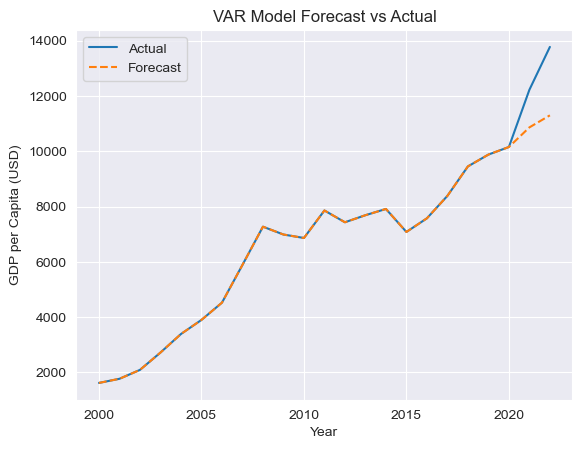

In [78]:
plt.plot(merged_data_macroeconomic.index, merged_data_macroeconomic['gdp_per_capita_usd'], label='Actual')
plt.plot(merged_data_macroeconomic.index, predictions_transformed_df['gdp_per_capita_usd_original'], label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.title('VAR Model Forecast vs Actual')
plt.legend()
plt.show()

The model did not have information about the events which occurred from 2019 to the present, and therefore makes poor predictions.

In conclusion, our journey through predictive modeling has illuminated both the promises and complexities of understanding macroeconomic trends. By integrating historical insights with data science techniques, we've taken strides towards unraveling the intricacies of Bulgaria's economic landscape. As we stand at this juncture, we recognize that our project is but a stepping stone to deeper insights, more accurate predictions, and a more resilient understanding of the forces that shape our nation's economic future.